In [1]:
from IPython.display import Image

In [2]:
Image(url='https://drive.google.com/uc?id=1EVoLw8Eruksbok5g2sF1K57mtgSTgLkz')

<div class="alert alert-block alert-info">
<b> DESAFÍO COMPLEMENTARIO: Obtención de insights</b> <br>
<b> Comisión </b> 32695 <br>
<b> Tutor </b> Joaquín Mata Castillo <br>    
<b> Alumnos </b> </br>
- Giuseppe Lavarello </br>
- Germán Tessmer </br>
- Juan Vaca </br>
</div>

***
# Índice de contenidos

    1. Resumen / Abstract
    2. Introducción
        2.1. Antecedentes, problemas, hipótesis y objetivos
            2.1.1. Hipótesis    
            2.1.2. Problemas a resolver    
            2.1.3. Objetivos    
            2.1.4. Contexto    
            2.1.5. Problemas de implementación
            2.1.6. Contexto analítico
        2.2. Preparación de la base de datos
            2.2.1. Carga de librerías    
            2.2.2. Carga del archivo    
            2.2.3. Descripción de la base de datos
    3. Análisis Exploratorio de Datos - Parte 1
        3.1. Identificación de variables para análisis exploratorio
        3.2. Análisis Exploratorio de Datos (EDA1)
            3.2.1. Distribución del ingreso de la ocupación principal por sexo
            3.2.2. Descripción de la población según nivel educativo
            3.2.3. Relación entre nivel educativo alcanzado e ingreso de la ocupación principal
            3.2.4. Resumen general de insights obtenidos por EDA1
    4. Transformación de variables (Data Wrangling)
        4.1. Identificación de variables para transformaciones
        4.2. Transformación de variables
            4.2.1. Salario por hora    
            4.2.2. Variables educativas
            4.2.3. Variables de contexto geográfico
            4.2.4. Variables de experiencia potencial           
            4.2.5. Variables de género o sexo
            4.2.6. Variables de empleo formal
            4.2.7. Variables por tipo de calificación
    5. Análisis Exploratorio de Datos - Parte 2
        5.1. Distribución del logaritmo del ingreso laboral real por hora
            5.1.1. Análisis previo
            5.1.2. Análisis gráfico
            5.1.3. Interpretación general de los resultados
        5.2. Descripción de la población según nivel educativo con nivel terciario
            5.2.1. Análisis gráfico
            5.2.2. Interpretación general de los resultados
        5.3. Relación entre nivel educativo alcanzado y el logaritmo del ingreso laboral por hora
            5.3.1. Análisis previo
            5.3.2. Análisis gráfico
            5.3.3. Interpretación general de los resultados
        5.4. Relación el logaritmo del ingreso laboral por hora y la experiencia potencial
            5.4.1. Análisis previo
            5.4.2. Análisis gráfico
            5.4.3. Interpretación general de los resultado
        5.5. Resumen general de insights obtenidos por EDA2
    6. Modelos de regresión
        6.1. Feature engineering
            6.1.1. Librerías
            6.1.2. Condicionamiento de instancias
            6.1.3. Condicionamiento de features
            6.1.4. Creación de variables dummies para las variables tipo objeto
            6.1.5. Adecuación de valores Nan
            6.1.6. Reporte automático de la base de datos depurada
            6.1.7. Identificación de la variable objetivo (y)
            6.1.8. Identificación de la matriz de características (X)
            6.1.9. Aplicación del método de selección
        6.2. Modelos de regresión
            6.2.1. Modelo teórico básico
            6.2.2. Modelo teórico con controles seleccionados sin feature engineering
            6.2.3. Modelo con variables seleccionadas con feature engineering
    7. Conclusiones generales


***

# 1. Resumen / Abstract

El concepto de **capital humano** se refiere al stock de conocimientos y características que posee el trabajador, ya sea de forma innata o adquirida, y que contribuyen a su productividad. Esta definición amplia incorpora no sólo los años de educación adquiridos, sino también una variedad de atributos que contribuyen a la formación de este capital. 

La calidad educativa, capacitación, actitudes hacia el trabajo, motivación; entre otras, son ejemplos de capital humano. En este sentido amplio, las diferencias en los ingresos de los individuos no son únicamente adjudicables a diferencias en los años de educación, sino también a otros factores.

Asimismo, es esperable que una parte importante del stock de conocimientos de una persona se encuentre relacionado al nivel de educación adquirido. En este marco es que la educación puede pensarse como un tipo de inversión. En consecuencia, personas más educadas van a ser también personas más productivas; con lo que en promedio deberían acceder a remuneraciones más altas con respecto a otras personas con menores niveles de formación.

Así, una estimación de los diferenciales de salarios de una población por nivel educativo, se puede utilizar para explicar una serie de fenómenos económicos, e incluso no económicos. Disponer de esta información es importante para:
-	Los **tomadores de decisiones** y **formuladores de políticas públicas** que deben decidir sobre el gasto en educación, la priorización de niveles de escolarización, y programas de financiamiento educativos.
-	Departamentos de **recursos humanos** de firmas intensivas en capital humano, como por el ejemplo, las del sector IT.
-	**Personas** que pueden hacer uso de estos resultados para ayudar guiar sus decisiones personales sobre cuánto deberían invertir en educación.
-   **Periodistas** o comunicadores especializados en economía o educación.

Asimismo, según los controles que se utilicen, la estimación puede servir para estimar la magnitud de las **brechas de género** en el mercado laboral, como así también para captar diferencias regionales entre distintos mercados.


***
# 2. Introducción

La estructura de este documento es amplia en materia de análisis. Para facilitar la lectura, tanto de los problemas conceptuales, como de los técnicos; se propone un esquema de tres colores donde se resaltan los puntos más importantes de cada sección.

<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> En este tipo de boxes se indicarán los problemas detectados a los fines de poder avanzar hacia la consecusión de los objetivos del trabajo. Son una combinación de problemas técnicos, que indican necesidad de mejora de código, pero que requieren ser interpretados desde el enfoque teórico planteado.</div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> Son la propuesta de solución general al problema anteriormente planteado. Muchas veces la solución debe dividirse en una sucesión de pasos intermedios. En ese caso, solo se muestra dentro del box al problema general, y las soluciones intermedias de los pasos subsiguientes se comentan en texto normal.
</div>

<div class="alert alert-block alert-info">
<b>INSIGHT :</b> En este tipo de box se remarcan los insights que se van obteniendo a lo largo del análisis. Este box se utiliza para cumplir dos funciones:
    
- Los insights obtenidos en un paso intermedio.
- Para sintetizar y resumir los insights obtenidos al final de un apartado.
</div>


## 2.1. Antecedentes, problemas, hipótesis y objetivos
### 2.1.1. Hipótesis

- Individuos con mayor nivel de educación formal ganan, en promedio, mejores salarios que individuos con menor nivel de educación.
- Existe una brecha de género que se refleja en diferenciales de salario.

### 2.1.2. Problemas a resolver

- ¿Existe alguna relación entre el nivel de estudios formales de un individuo y su nivel de ingresos laborales?
- De existir esa relación, ¿puede predecirse alguna medida de ingresos según nivel de estudios?
- Además del nivel de estudios y el de ingresos, ¿qué variables permiten realizar una caracterización descriptiva de la población bajo estudio?

### 2.1.3. Objetivos

Los objetivos de este proyecto son: 
- Realizar un cuadro descriptivo de la población urbana argentina en el primer trimestre de 2022, referido a la relación entre el nivel de estudios obtenidos y su correspondiente ingreso laboral.
- Estimar las diferencias de salario por nivel educativo para la población urbana argentina, en el primer trimestre de 2022.

### 2.1.4. Contexto

Al primer trimestre de 2022, la Argentina exhibe algunas mejorías en lo referido a las tasas generales de resumen del mercado laboral, como ser: aumento del empleo y de la tasa de actividad y caída del desempleo. 


In [3]:
Image(url='https://drive.google.com/uc?id=1ELNfFMYW4Z2c3wlUD5DIOq9pxspPM6st')

Esto último tiene su correlato en la evolución del Estimador Mensual de Actividad Económica (EMAE), que se muestra en la siguiente tabla. Como se puede observar, se han registrado mejoras permanentes a lo largo de todo 2022, tanto de cada mes con respecto al mes anterior, como en términos de variaciones interanuales.


In [4]:
Image(url='https://drive.google.com/uc?id=1EKF8dl45j_CPEg_xAp6mP9s1LlVSV9jx')

Sin embargo, los especialistas argumentan que el recupero post-pandemia ha venido acompañado por desmejoras en la calidad de dicho empleo. Por ejemplo, por convención se utiliza el descuento jubilatorio como un indicador para clasificar al empleo entre formal e informal. Al respecto, en el [Informe Mercado de trabajo. Tasas e indicadores socioeconómicos del Segundo trimestre de 2022]( https://www.indec.gob.ar/uploads/informesdeprensa/mercado_trabajo_eph_2trim228FD416F03D.pdf) de INDEC se afirma que “ entre la población asalariada se observó un aumento de la proporción de quienes no cuentan con descuento jubilatorio en 6,3 p.p., de 31,5% a 37,8%. Como contrapartida, la porción de personas asalariadas con descuento jubilatorio pasó de 68,5% a 62,2%”.

Por su parte, a partir de junio de 2021 la tasa de inflación interanual ha roto la marca de 50%, presionando en las condiciones generales de vida de la población y acelerando la puja distributiva a lo largo del año. Hacia agosto 2022, la tasa de incremento interanual fue de 78,5%.

Menos alejado de los problemas coyunturales, los indicadores de rendimiento escolar vienen mostrando un deterioro paulatino en los últimos años, que prende alarmas sobre la capacidad de recuperación futura de una población que tiene cada vez mayores dificultades para acumular capital humano.


In [5]:
Image(url='https://drive.google.com/uc?id=1EKx_ZVMgoXaLapSr2yOo7plFcnVTqFEQ')

Finalmente, la aceleración provista por el cambio tecnológico post-pandemia obliga a replantear las estrategias de las firmas de cara al futuro. Y asi como la demanda laboral cambia, también lo hace la oferta. En este contexto, no resulta obvio que las modalidades de estudio que propone la educación superior, con carreras con un promedio de duración de 5 años, no entren en competencia por la captación de talento con modalidades alternativas de estudio que proponen plazos más cortos y pronta salida laboral. Situación que se viene registrando recurrentemente en las carreras tecnológicas.

De ser esto así, no resulta obvio que al cambiar el marco de referencia cambie también la relación entre nivel de ingresos y educación, o que las diferencias entre el nivel superior y el terciario en materias de ingresos, sea menor al que usualmente se cree.


### 2.1.5. Problemas de implementación

- ¿Qué tan significativas son los diferenciales de salarios por nivel educativo?
- ¿Qué tipo de modalidad de educación debería priorizarse de cara al futuro?
- ¿Qué tan significativa es la brecha de género por ingresos laborales?
- ¿Qué tipo de políticas deberían derivarse de la identificación de esta última?

### 2.1.6. Contexto analítico

Para poder determinar el diferencial de salarios por nivel educativo, se cuenta con la Encuesta Permanente de Hogares (EPH). Dicho relevamiento, se efectúa en forma continua en los principales 31 aglomerados urbanos del país de forma trimestral por regiones y aglomerados. Para este trabajo se ha decidido modelar el 1er trimestre de 2022, que es el último dato disponible al 29/08/2022, fecha en la se da inicio a este proyecto. Sin embargo, se espera que el modelo puede aplicarse tanto a períodos anteriores, como a futuras actualizaciones de la encuesta.

La EPH es un programa nacional de producción sistemática y permanente de indicadores sociales que lleva a cabo el Instituto Nacional de Estadística y Censos (INDEC), que permite conocer las características sociodemográficas y socioeconómicas de la población.

Es una encuesta urbana que alcanza actualmente una representatividad de 71% de la población urbana total y 62% de la población total del país. En todos los casos, la EPH brinda información socio-demográfica de los individuos y, de sus condiciones y retribuciones en el mercado laboral que ellos mismos informan.

Con los datos obtenidos en esta encuesta se proporcionan regularmente, entre otros resultados, las tasas oficiales de empleo, desocupación, subocupación y pobreza. Los objetivos generales se orientan al desarrollo de un sistema integrado de indicadores sociales. En función de esos objetivos generales, se rescata un conjunto de dimensiones básicas que responden a caracterizar a la población en términos de:

- Sus características demográficas.
- Su inserción en la producción social de bienes y servicios.
- Su participación en la distribución del producto social.

Una de las limitaciones de trabajar con datos provenientes de la EPH, es que el relevamiento capta únicamente poblaciones urbanas, las que generalmente se encuentran más densamente pobladas con respecto a la zona más amplia que circunda cada aglomerado. Siendo esto así, es probable que la participación de profesionales en el mercado laboral se encuentre sobreestimada con respecto al total de la población económicamente activa del país, bajo el supuesto de que el grueso de los profesionales se encuentra radicado en las grandes urbes, donde los grados de diversificación y especialización del trabajo son mayores. 

Otra de las limitaciones a tener en cuenta, y que opera en sentido contrario al mencionado anteriormente, es la existencia de un problema recurrente en las encuestas de hogar en la que los individuos con ingresos elevados suelen sub-declarar el ingreso percibido, con la implicancia de que los montos estimados a través de estos datos tiendan a ser más bajos de lo que realmente son.

Para este trabajo, se trabajará con una versión curada de la EPH, provista por el [Observatorio Económico Social | UNR](https://observatorio.unr.edu.ar/encuesta-permanente-de-hogares-eph/). Esta versión tiene la particularidad de que cada archivo presenta una única base relacionada, producto de compilar las bases  originales de individuo y hogar en una sola, a través de las variables CODUSU y NRO_HOGAR.

Como valor agregado, proponen un uso intuitivo para el usuario. Cada variable ha sido renombrada con un nombre no codificado, y etiquetada para que su significado pueda ser leído directamente desde la interfaz del programa. Lo mismo se ha hecho con los valores internos de cada variable. En vez de presentar números solo interpretables con el manual original de EPH, también se han etiquetado los significados de cada valor. Asimismo, se han incorporado nuevas variables, que se pueden clasificar en tres grupos:

- Producto del cálculo de dos o más variables dentro de la base original; como puede ser el caso del cálculo de NBI.
- Producto del cruce con datos externos a EPH; como puede ser las variables deflactadas de las distintas fuentes de ingresos.
- Producto del desglose de clasificadores cerrados; como pueden ser las derivadas del Clasificador Nacional de Ocupaciones.


**Categorías o temáticas en la que puede incluirse el dataset**

- **Economía:** La EPH permite realizar el cálculo de medidas sintéticas de seguimiento del mercado laboral (tasa de empleo, tasa de desocupación, tasa de actividad, entre otras), como asi también medidas referidas a la distribución del ingreso (coeficiente de Gini).
- **Social:** La EPH releva condiciones estructurales de la población urbana, en las que se incluyen no solo características de los individuos, sino también composición de los hogares e indicadores de calidad de vida. Por ejemplo, con los datos de la EPH se pueden calcular medidas de Necesidades Básicas Insatisfechas (NBI).


## 2.2. Preparación de la base de datos
### 2.2.1. Carga de librerias

In [6]:
# De datos
import numpy as np
import pandas as pd
from numpy import nan
from numpy import isnan


# De visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Matemáticas
import math


# Reportes automáticos
from pandas_profiling import ProfileReport


# Para selection y regresiones
import statsmodels.api as sm
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Para la evaluacion de datos tipo nan
import missingno as msno

# Estilos de seaborn activados
sns.set()

### 2.2.2. Carga del archivo

In [7]:
# Como archivo compartido en Drive
url = "https://drive.google.com/file/d/1Hu_C1k0m4NAPiVCh5anrRTxrIf5orHHu/view?usp=sharing"
ruta = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

# Carga del archivo
df = pd.read_csv(ruta, low_memory = False)

### 2.2.3. Descripción de la base de datos

In [8]:
# Dimensiones del data frame
print('La base de datos de la EPH en el primer trimestre de 2022, cuenta con', df.shape[0], 'instancias y', df.shape[1], 'atributos')

La base de datos de la EPH en el primer trimestre de 2022, cuenta con 49706 instancias y 322 atributos


***
# 3. Análisis Exploratorio de Datos - Parte 1

## 3.1. Identificación de variables para análisis exploratorio

**Identificación de hogares**
- <b> codusu: </b> Código para distinguir viviendas. 
- <b> nro_hogar: </b> Código para distinguir hogares.
- <b> id_hogar: </b> Identificador del hogar al interior de una vivienda
- <b> componente: </b> Orden asignado a cada persona por hogar dentro de cada vivienda.
- <b> pondera: </b> | Ponderador sin corrección que se utiliza como factor de expansión para la mayoría de las variables

**Salario por hora**
- <b> ingreso_ocupacion_principal: </b> Ingreso de la ocupación principal

**Educación**
- <b> nivel_educ_obtenido: </b> Nivel educativo obtenido por el miembro del hogar

**Sexo (género)**
- <b> sexo: </b> ¿Cuál es el sexo del miembro del hogar?


## 3.2. Análisis Exploratorio de Datos (EDA1)

En esta sección se realiza un análisis de las variables en "estado puro", entendiendose como tal a las variables tal como se presentan en la base de datos.


In [9]:
# Corroboración de individuos duplicados
df['id_persona'] = df['id_hogar'].map(str) + df['componente'].map(str)
duplo = df.duplicated(subset=['id_persona'])
print('La base presenta', duplo.sum(), 'individuos duplicados')

La base presenta 0 individuos duplicados


In [10]:
# Limpieza de objetos
del duplo

### 3.2.1. Distribución del ingreso de la ocupación principal por sexo

#### 3.2.1.1. Análisis previo

La EPH releva información de personas activas e inactivas, entre las que se incluyen jubilados y menores. De forma tal que es esperable que haya individuos dentro de la base que tengan imputados ingresos iguales a 0.

Asimismo, existen tres valores que deben tenerse en cuanta antes de realizar el análisis:
- 7 = No tenía esa ocupación
- 8 = No tuvo ingresos por el mes de referencia
- 9 = Ns/Nr

In [11]:
# Análisis descriptivo básico
df1 = df[['ingreso_ocupacion_principal', 'sexo']]
df1.describe()

,ingreso_ocupacion_principal
count,4.970600e+04
mean,1.919863e+04
std,3.961319e+04
min,-9.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.000000e+04
max,2.000000e+06


<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> Como se puede observar, la variable de ingreso sin ajustes muestra que más de la mitad de la población relevada reporta ingresos con valor 0, dado que incluye a la población inactiva. Asimismo, el valor mínimo de -9 revela que hubo respuestas de tipo especial para esta variable, que no son informativas del nivel de ingresos. Finalmente, es factible que apararezcan valores NaN.</div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> A los fines de mejorar la caracterización, se quitaran del análisis a aquellos individuos que reporten valores iguales o menores a cero y NaN.
</div>

<div class="alert alert-block alert-info">
<b>INSIGHT :</b> La población inactiva no es relevante para los objetivos de este estudio.
</div>


In [12]:
# Tabla de frecuencia para la variable sexo
sexo = pd.crosstab(index = df1['sexo'], columns = 'count')
sexo

col_0,count
sexo,
Hombre,23843
Mujer,25863


<div class="alert alert-block alert-info">
<b>INSIGHT :</b> La base que incluye a la totalidad de la población de la EPH, se encuentra relativamente balanceada con respecto a la variable sexo.
</div>

In [13]:
# Contar el numero de observaciones con valor 0
obs_cero = (df['ingreso_ocupacion_principal'] == 0).sum()
print('La cantidad de individuos que reportan ingreso igual a cero es:', obs_cero)

La cantidad de individuos que reportan ingreso igual a cero es: 29029


In [14]:
# Contar el numero de observaciones con valores anómalos (menor a 0)
obs_mal = (df['ingreso_ocupacion_principal'] < 0).sum()
print('La cantidad de individuos que reportan valores anómalos es:', obs_mal)

La cantidad de individuos que reportan valores anómalos es: 3465


In [15]:
# Contar el numero de observaciones con valores NaN
obs_nan = df['ingreso_ocupacion_principal'].isna().sum()
print('La cantidad de individuos que reportan valores NaN es:', obs_nan)

La cantidad de individuos que reportan valores NaN es: 0


In [16]:
# Individuos a quitar
obs_tot = obs_cero + obs_mal + obs_nan
print('La cantidad de individuos totales a quitar es:', obs_tot)

La cantidad de individuos totales a quitar es: 32494


In [17]:
# Limpieza de objetos
del obs_cero, obs_mal, obs_nan, obs_tot

In [18]:
# Quitar valores 
df1 = df1[df1['ingreso_ocupacion_principal'] > 0]
print('La cantidad de individuos que reportan ingresos por ocupación principal mayor a 0 es:', df1.ingreso_ocupacion_principal.count())

La cantidad de individuos que reportan ingresos por ocupación principal mayor a 0 es: 17212


In [19]:
# Descripcion de la variable cuantitativa de la serie modificada
df1.describe().round(1)

,ingreso_ocupacion_principal
count,17212.0
mean,55444.9
std,50219.6
min,200.0
25%,25000.0
50%,45000.0
75%,70000.0
max,2000000.0


In [20]:
print('Como es de esperar, la base muestra diferencias notorias en la distribución del ingreso de la ocupación principal declarada por los encuestados. De un total de', df1.ingreso_ocupacion_principal.count(), 'individuos, el salario de menor cuantía es de $', df1.ingreso_ocupacion_principal.min(), 'en tanto que el de mayor cuantía es de', df1.ingreso_ocupacion_principal.max(), 'pesos.')

Como es de esperar, la base muestra diferencias notorias en la distribución del ingreso de la ocupación principal declarada por los encuestados. De un total de 17212 individuos, el salario de menor cuantía es de $ 200.0 en tanto que el de mayor cuantía es de 2000000.0 pesos.


In [21]:
# Descripcion de la variable cualitativa de la serie modificada
sexo = pd.crosstab(index = df1['sexo'], columns = 'count') 
sexo

col_0,count
sexo,
Hombre,9578
Mujer,7634


<div class="alert alert-block alert-info">
<b>INSIGHT :</b> Al incorporarse algún criterio de exclusión razonable con respecto a las personas que efectivamente se encuentran activas en el mercado laboral, la proporsión entre hombres y mujeres se modifica, con mayor peso de los primeros. Por tanto, se puede conjeturar que existe un sesgo en las barreras de entrada al mercado laboral que se inclina a favor de los hombres y en contra de las mujeres.
</div>

In [22]:
# Limpieza de objetos
del sexo, nan

#### 3.2.1.2. Transformaciones

In [23]:
# Contar cantidad de individuos con ingresos mayores o iguales a $250 mil.
ricos = df1[df1['ingreso_ocupacion_principal'] >= 250000].count()
ricos_part = ricos.sexo / df1.sexo.count()
print('Los individuos con ingresos mayores a $250 mil son:', ricos.sexo)
print('Estos representan una proporción de', ricos_part.round(4), 'del total de la población relevada')

Los individuos con ingresos mayores a $250 mil son: 136
Estos representan una proporción de 0.0079 del total de la población relevada


In [24]:
# Limpieza de objetos
del ricos, ricos_part

<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> Como se puede observar, el grueso de la población se concentra en ingresos menores a $250 mil. Al ser aparentemente tan pocos individuos los que perciven ingresos superiores a ese monto, se dificulta realizar un análisis más profundo de la distribución de ingresos de la mayoría de la población. </div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> Realizar una subconjunto de individuos con ingresos menores a $250 mil.
</div>

In [25]:
# Quitar individuos con ingreso mayores a $250k
df1 = df1[df1['ingreso_ocupacion_principal'] < 250000]

# Se crea una variable con valores vacios
df1['full'] = " "

<ipython-input-25-b2cfde3e9cfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full'] = " "


<div class="alert alert-block alert-info">
<b>INSIGHT :</b> 
    
- La distribuición del ingreso población es asimétrica a la derecha. Es decir, muchos individuos que ganan relativamente poco, y pocos individuos que ganan relativamente mucho. 
- Acorde a lo anterior, quitar outliers de la serie no permite tener una visión global y adecuada del problema.
- Dado que la dedicación horaria al trabajo de cada persona varia, se requiere una variable que refleje este punto.
</div>

#### 3.2.1.3. Análisis gráfico

<Figure size 432x288 with 0 Axes>

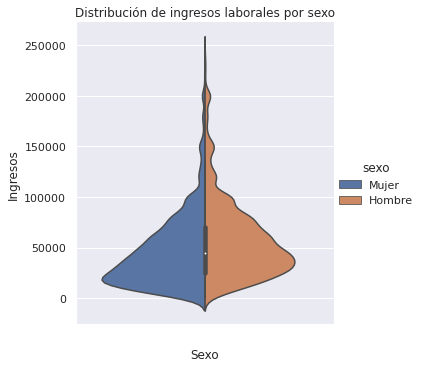

In [26]:
# Gráfico de violín 
%matplotlib inline
fig1 = plt.figure()
ax = sns.catplot(data = df1, 
                 kind = 'violin',
                 x = 'full',
                 y = 'ingreso_ocupacion_principal',
                 hue = 'sexo',
                 split = True)
ax.set(xlabel = 'Sexo', 
       ylabel = 'Ingresos',
       title = 'Distribución de ingresos laborales por sexo')
plt.show()

#### 3.2.1.4 Interpretación general de los resultados

Los resultados muestran que:

- La población de la muestra se encuentra balanceada en términos de género.
- Sin embargo, cuando se depura la muestra de valores anómalos, todo parece indicar que existe mayor inserción laboral de hombres por sobre mujeres.
- Asimismo, el 0.79% de la población relevada percive ingresos declarados superiores a $250 mil.
- Cuando se analiza la distribución del ingreso por ocupación principal presindiendo de este sub-conjunto, se puede observar que:
   - El ingreso promedio en mujeres es menor al de hombres.
   - Estas diferencias de nivel, persisten a lo largo de toda la distribución del ingreso.

<div class="alert alert-block alert-info">
<b>Resumen de los insighs de esta sección:</b> 

- La población inactiva no es relevante en los objetivos de este estudio. Por tanto, debería crearse una variable de ingresos controlada por dicha población.
- Es necesario preservar la distribución asimétrica del ingreso, para tener una correcta caracterización del problema.
- Es necesario expresar los ingresos bajo un mismo soporte de tiempo dedicado a obtener el ingreso dentro del mercado laboral.
</div>

### 3.2.2. Descripción de la población según nivel educativo

Uno de los puntos a analizar en este proyecto es la relación (si la hubiera) entre nivel de estudios y salarios. Al respecto, en este apartado se presenta una caracterización de la población por nivel de estudios, para en el siguiente apartado mostrar la relación mencionada.


### 3.2.2.1. Análisis previo

In [27]:
# Tabla de frecuencia para la variable sexo
pd.crosstab(index = df['nivel_educ_obtenido'], columns = 'count')

col_0,count
nivel_educ_obtenido,
Primaria Completa,5903
Primaria Incompleta,6966
Secundaria Completa,10156
Secundaria Incompleta,10311
Sin instrucción,3637
Universitaria Completa,6799
Universitaria Incompleta,5934


In [28]:
# Contar el numero de observaciones con valores NaN
obs_nan = df['nivel_educ_obtenido'].isna().sum()
print('La cantidad de individuos que reportan valores NaN es:', obs_nan)

La cantidad de individuos que reportan valores NaN es: 0


In [29]:
# Datos
distrib_educacion = df['nivel_educ_obtenido'].value_counts()
etiquetas = distrib_educacion.index
print(distrib_educacion)
print('-------------------')
print(etiquetas)

Secundaria Incompleta       10311
Secundaria Completa         10156
Primaria Incompleta          6966
Universitaria Completa       6799
Universitaria Incompleta     5934
Primaria Completa            5903
Sin instrucción              3637
Name: nivel_educ_obtenido, dtype: int64
-------------------
Index(['Secundaria Incompleta', 'Secundaria Completa', 'Primaria Incompleta',
       'Universitaria Completa', 'Universitaria Incompleta',
       'Primaria Completa', 'Sin instrucción'],
      dtype='object')


### 3.2.2.2. Análisis gráfico

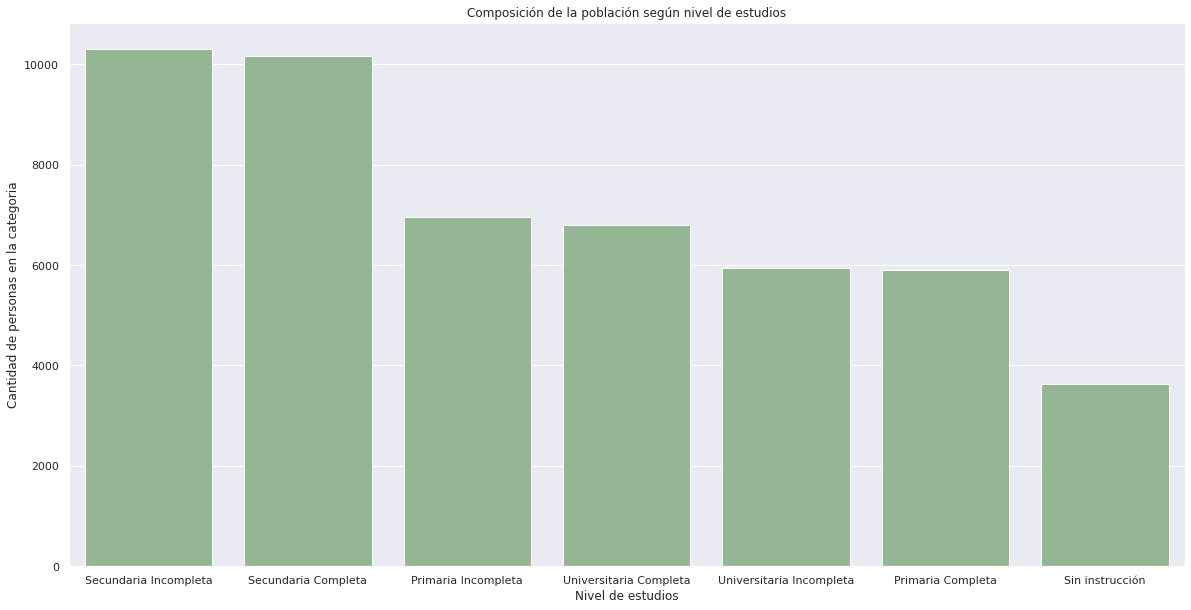

In [30]:
# Gráfico de barras
%matplotlib inline
plt.figure(figsize = (20, 10))
ax = sns.barplot( x = etiquetas, y = distrib_educacion, color = 'darkseagreen')

ax.set_ylabel('Cantidad de personas en la categoria')
ax.set_xlabel('Nivel de estudios')
ax.set_title('Composición de la población según nivel de estudios')
plt.show()

In [31]:
# Limpieza de objetos
del obs_nan, distrib_educacion, etiquetas

### 3.2.2.3. Interpretación general de los resultados

Los valores que muestran el gráfico son los esperables. La mayor participación corresponde a personas con nivel de estudios secundarios completos (20,4%), que en Argentina es el último nivel de estudios obligatorio. Llama la atención el elevado número de individuos con primaria completa (11,9%), del que puede inferirse por el resto de las clasificaciones, que es un estado más permanente, en tanto perspectivas educativas de ese segmento de la población.


<div class="alert alert-block alert-info">
<b>Resumen de los insighs de esta sección:</b> 

- El análisis de la relación entre nivel de estudios e ingresos, requiere que se imponga un límite de edad, de forma tal que se descarten a aquellos individuos de los que se espera que sean efectivamente inactivos dado su nivel de estudios. Por ejemplo, un individuo de 15 años que aún cursa estudios secundarios.
- La clasificación que brinda por defecto la EPH no incluye nivel de estudios terciarios completos e incompletos. Una mejor caracterización de la población debería incluirlos.

</div>

### 3.2.3. Relación entre nivel educativo alcanzado e ingreso de la ocupación principal

#### 3.2.3.1. Análisis previo


In [32]:
# Selección de variables
df1 = df[['nivel_educ_obtenido', 'ingreso_ocupacion_principal', 'sexo']]
df1

,nivel_educ_obtenido,ingreso_ocupacion_principal,sexo
0,Universitaria Completa,150000.0,Mujer
1,Universitaria Incompleta,10000.0,Mujer
2,Secundaria Incompleta,0.0,Hombre
3,Universitaria Completa,-9.0,Mujer
4,Secundaria Completa,0.0,Hombre
...,...,...,...
49701,Primaria Completa,0.0,Mujer
49702,Universitaria Completa,0.0,Hombre
49703,Universitaria Completa,0.0,Mujer
49704,Universitaria Completa,50000.0,Mujer


<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> Por las mismas razones expuestas en el primer apartado, la variable de ingreso muestra individuos con ingresos iguales 0, dado que incluye a la población inactiva. Asimismo, el valor mínimo de -9 revela que hubo respuestas de tipo especial para esta variable, que no son informativas del nivel de ingresos. </div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> A los fines de mejorar la caracterización, se quitaran del análisis a aquellos individuos que reporten valores iguales o menores a cero.
</div>

#### 3.2.3.2. Transformaciones

In [33]:
# Selección de inviduos bajo método booleano
filtro = df1['ingreso_ocupacion_principal'] > 0

# Dataset depurado de valores menores a 0
df1_bool = df1[filtro]

# Dataset depurado de outliers
df1_bool2 = df1_bool[df1_bool['ingreso_ocupacion_principal'] < 2000000 ]

Para la construcción de este gráfico se excluye el valor atípico de la serie de ingresos de la ocupación principal fijado en 2M.

#### 3.2.3.3. Análisis gráfico

[Text(0, 0.5, 'Ingresos por ocupación principal'),
 Text(0.5, 0, 'Nivel educativo alcanzado'),
 Text(0.5, 1.0, 'Boxplot de ingreso de ocupación principal por nivel de estudios alcanzados')]

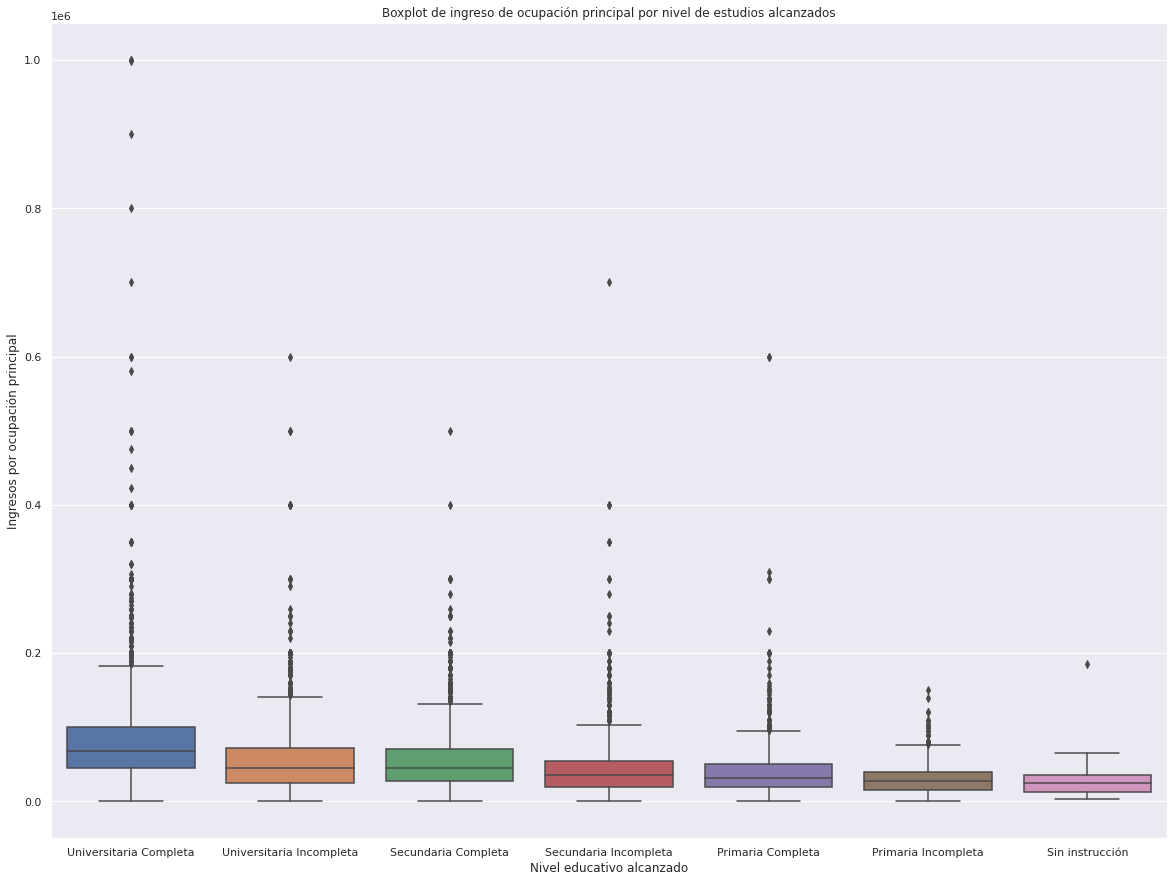

In [34]:
# Gráficos de boxplot
%matplotlib inline
fig3 = plt.figure(figsize = (20, 15))
ax = sns.boxplot(x = 'nivel_educ_obtenido',
                 y = 'ingreso_ocupacion_principal',
                 data = df1_bool2,
                 orient = "v")
ax.set(xlabel = 'Nivel educativo alcanzado', 
       ylabel = 'Ingresos por ocupación principal',
       title = 'Boxplot de ingreso de ocupación principal por nivel de estudios alcanzados')

#### 3.2.3.4. Interpretación general de los resultados

La información presentada indica que, en promedio, existe una relación tal que a mayor nivel educativo, mayor nivel de ingresos de la ocupación principal.

Asimismo, a medida que aumenta el nivel educativo, también lo hace la dispersión de ingresos en su cola positiva. Es decir, la cantidad de observaciones registradas en el cuarto cuartil aumenta a medida que aumenta el nivel de estudios.

Esto último podría indicar que a mayor capacitación, mayores oportunidades de captar renta extraordinaria en el mercado laboral por parte de los individuos. O bien, que existen otros factores que explican el nivel de ingresos laborales además del nivel de estudios obtenidos.

<div class="alert alert-block alert-info">
<b>Resumen de los insighs de esta sección:</b> 

- Un modelo que muestre la relación entre nivel de ingresos y de estudios, debería incluir otras variables explicativas que insidan en la primera.

</div>

In [35]:
del filtro

### 3.2.4. Resumen general de insights obtenidos por EDA1
Los insights del análisis explotario sugieren que:

<div class="alert alert-block alert-info">


- La población inactiva no es relevante en los objetivos de este estudio.
- Es necesario preservar la distribución asimétrica del ingreso, para tener una correcta caracterización del problema.
- Es necesario expresar los ingresos bajo un mismo soporte de tiempo dedicado a obtener el ingreso en el mercado laboral.
- Para analizar la relación entre nivel de estudios e ingresos, debería imponerse a la población un límite de edad, de forma tal que se descarten a aquellos individuos de los que se espera que sean inactivos dado su nivel de estudios.
- La clasificación que brinda por defecto la EPH no incluye nivel de estudios terciarios completos e incompletos. Una mejor caracterización de la población debería incluirlos.
- Un modelo que muestre la relación entre nivel de ingresos y de estudios, debería incluir otras variables explicativas que insidan en la primera.

</div>

Sobre este último punto, se proyecta incluir:
- Diferencias regionales. Como Argentina posee un territorio amplio, no uniformemente conectado, puede suponerse que existen diferencias regionales en el nivel general de salarios.
- La construcción de una variable de experiencia laboral, que capte aspectos de capacitación no formal y especialización en un tipo de puesto laboral.
- La discriminación entre empleo formal y no formal, tomandolo como un indicador de calidad de empleo y con incidencia en el nivel de salarios.
- La discriminación por el tipo de ocupación, como otro indicador de la calidad de la tarea que desempeña el individuo.


***
# 4. Transformación de variables (Data wrangling)
## 4.1. Identificación de variables para transformaciones
En esta sección se incorpora para el análisis un conjunto de variables que incorporen los insights de la sección anterior.

**Identificación de hogares**
- <b> codusu: </b> Código para distinguir viviendas. 
- <b> nro_hogar: </b> Código para distinguir hogares.
- <b> id_hogar: </b> Identificador del hogar al interior de una vivienda
- <b> componente: </b> Orden asignado a cada persona por hogar dentro de cada vivienda.
- <b> pondera: </b> | Ponderador sin corrección que se utiliza como factor de expansión para la mayoría de las variables

**Salario por hora**
- <b> ingreso_ocupacion_principal: </b> Ingreso de la ocupación principal
- <b> ingreso_real_ocupacion_principal: </b> Monto de ingreso real de la ocupación principal
- <b> condicion_actividad: </b> Condición de actividad del miembro del hogar con respecto al mercado laboral
- <b> horas_ocupacion_principal_semana: </b> El miembro del hogar ocupado en la semana de referencia, ¿qué cantidad de horas trabajó por motivo de su ocupación principal en la semana anterior al momento de realizarse la encuesta?

**Educación**
- <b> nivel_educ_obtenido: </b> Nivel educativo obtenido por el miembro del hogar
- <b> nivel_educ_cursado: </b> ¿Cuál es el nivel educativo más alto que actualmente cursa, o cursó el miembro del hogar?
- <b> finalizo_educacion: </b> El miembro del hogar, ¿finalizó el nivel educativo más alto que actualmente cursa o cursó?
- <b> anio_aprobado: </b> ¿Cuál fue el último año del nivel de educación correspondiente que aprobó el miembro del hogar?

**Contexto geográfico**
- <b> region: </b> Código de región

**Experiencia potencial**
- <b> edad: </b> ¿Cuántos años cumplidos tiene el miembro del hogar?

**Sexo (género)**
- <b> sexo: </b> ¿Cuál es el sexo del miembro del hogar?

**Empleo formal**
- <b> condicion_actividad: </b> Condición de actividad del miembro del hogar con respecto al mercado laboral
- <b> desc_jubilatorio_asalariado: </b> En el trabajo del asalariado que considera su ocupación principal, ¿tiene descuento jubilatorio? (se incluye es esta pregunta a quienes realicen actividades de servicio doméstico)
- <b> categoria_ocupacional: </b> Categoría ocupacional para el miembro activo (ocupado y desocupado) del hogar

**Tipo de ocupación**
- <b> codigo_ocupacion: </b> Código de ocupación (en referencia al lugar donde mayor carga horaria de trabajo)
- <b> calificacion_ocupado: </b> Clasificación de los ocupados a partir los requerimientos de conocimientos y habilidades implicados en el trabajo donde desempeña su actividad principal
- <b> profesional: </b> Calificación profesional siendo parte de la población económicamente activa (siendo ocupado o desocupado condicional)
- <b> tecnico: </b> Calificación técnica siendo parte de la población económicamente activa (siendo ocupado o desocupado condicional)
- <b> operativo: </b> Calificación de operativo siendo parte de la población económicamente activa (siendo ocupado o desocupado condicional)
- <b> no_calificado: </b> No calificado siendo parte de la población económicamente activa (siendo ocupado o desocupado condicional)


## 4.2. Transformación de variables

El gráfico siguiente permite realizar una visualización de los datos NaN.


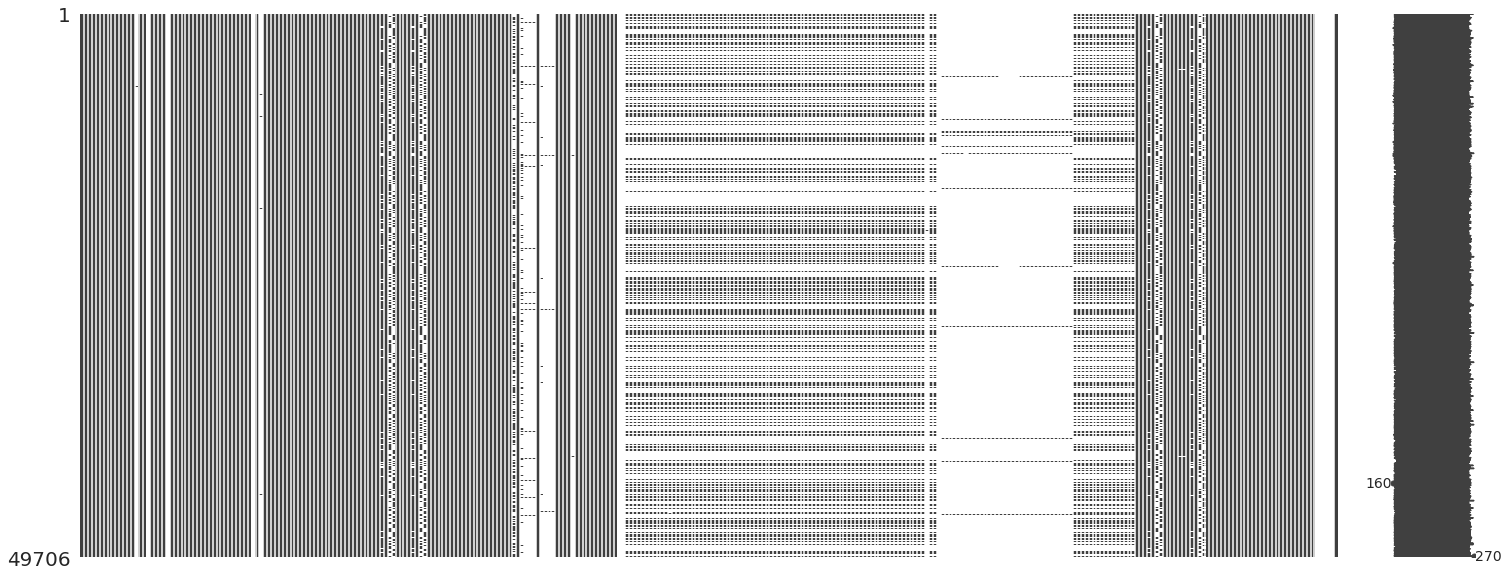

In [36]:
msno.matrix(df)

Como se puede observar en el gráfico anterior basado en la base de datos original, se presenta una situación heterogenea. Existen columnas con bajo registro de datos (predominio del color blanco), y columnas con negro o gris, que indican la presencia casi total de datos.

Es necesario mencionar que muchos de los datos que están presentes en el DataFrame, son valores no válidos por lo que se  reemplazarán por valores de tipo "NaN". Esta transformación básica habilita a que las observaciones puedan comenzar a trabajarse con herramientas predictivas.

In [37]:
# Tratamiento general. Se reemplazan todas las variables vacias a NaN
df = df.replace(' ', np.nan) 

### 4.2.1. Salario por hora

<div class="alert alert-block alert-warning">
<b>PROBLEMAS:</b> 

- Los ingresos de la ocupación principal se encuentran expresados como un número cerrado, que no tiene en cuenta distintas dedicaciones de tiempo de trabajo por cada individuo. Por tanto, se requiere realizar comparaciones de salario por hora (o alguna otra medida de tiempo).
- Es esperable que la distribución del ingreso poblacional, sea profundamente asimétrica. Por lo tanto, se requiere alguna transformación. Eliminar outliers en este contexto no parece ser una opción viable con respecto al problema que se está tratando.
- En caso de que exista la posibilidad de realizar comparaciones intertemporales, es preferible utilizar ingresos expresados en términos reales. Es decir, depurados de la influencia de inflación.
- Solo tiene sentido tomar individuos que se encuentren efectivamente trabajando. Aquellos que se encuentren desocupados, reportan ingreso laboral nulo, y no permiten una buena interpretación de los datos.
</div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> Crear una variable que refleje el ingreso laboral real por hora.
    
- Laboral: que refleje solo ingreso obtenido por el trabajo ejecutado por un individuo, y donde se supone que incide el nivel de educación.
- Real: que el ingreso se encuentre depurado de la influencia de la inflación.
- Por hora: que la dedicación de los individuos en el mercado laboral pueda ser comparable.
</div>


#### 4.2.1.1. Variable: Ingreso laboral
Se cuenta como ingreso laboral al ingreso de la ocupación principal de individuos que declaran ser ocupados

In [38]:
# Se toma solo el ingreso de individuos ocupados
df['ingreso_laboral'] = np.where(df['condicion_actividad'] == 'Ocupado', 
                                 df['ingreso_ocupacion_principal'], 
                                 np.nan)

# Se convierten valores de no respuesta a NaN
df['ingreso_laboral'] = np.where(df['ingreso_laboral'] < 0, 
                                 np.nan, 
                                 df['ingreso_laboral'])

**NOTAS:** 
- Hay personas que tienen ingresos laborales pero no trabajaron esa semana. Pueden haber estado suspendidas, enfermas, etc. 
- O también pueden figurar que tienen empleo y cero ingreso laboral porque no pudieron ir a trabajar por enfermedad. 
- De todos modos desaparecen al hacer ingreso por hora (ver abajo).

#### 4.2.1.2. Variable: Cantidad de horas trabajadas
Se depuran las variables de sin respuesta de la ocupación de horas totales trabajadas

In [39]:
# Se convierten valores de no respuesta a NaN
df['horas_trabajadas'] = np.where(df['horas_ocupacion_principal_semana'] == 999, 
                                  np.nan, 
                                  df['horas_ocupacion_principal_semana'])

#### 4.2.1.3. Variable: Ingreso laboral real
Se cuenta como ingreso laboral real al ingreso de la ocupación principal real de individuos que declaran ser ocupados

In [40]:
# Se toma solo el ingreso real de individuos ocupados
df['ingreso_laboral_real'] = np.where(df['condicion_actividad'] == 'Ocupado', 
                                      df['ingreso_real_ocupacion_principal'], 
                                      np.nan)

# Se convierten valores de no respuesta a NaN
df['ingreso_laboral_real'] = np.where(df['ingreso_laboral_real'] < 0, 
                                      np.nan, 
                                      df['ingreso_laboral_real'])

#### 4.2.1.4. Variable: Ingreso laboral real por hora
Se calcula el ingreso real por hora de los individuos.
Se quita a:
- Los que declaran trabajar cero horas.
- Se pone un tope de 112 horas laborales, equivalentes a 16 horas por día.

In [41]:
# Condicionamiento y cálculo de la variable
df['ingreso_laboral_real_porhora'] = np.where((df['horas_trabajadas'] <= 112) & 
                                              (df['horas_trabajadas'] > 0),
                                              (df['ingreso_laboral_real']/df['horas_trabajadas'])/4,
                                              np.nan)


# Reemplazo de posibles valores infinitos con nan
df['ingreso_laboral_real_porhora'].replace([np.inf, -np.inf], np.nan, inplace = True)

#### 4.2.1.5. Variable: Logaritmo del ingreso laboral real por hora

In [42]:
# Se transforma la variable para evitar quitar outliers
df['log_ingreso_laboral'] = np.log(df['ingreso_laboral_real_porhora'])

# Reemplazo de posibles valores infinitos con nan
df['log_ingreso_laboral'].replace([np.inf, -np.inf], np.nan, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
# Limpieza de objetos
del df1_bool, df1_bool2

### 4.2.2. Variables educativas

<div class="alert alert-block alert-warning">
<b>PROBLEMAS:</b> 

- La variable nivel_educ_obtenido no discrimina nivel terciario (completo e incompleto). Si se está buscando entender la relación entre nivel de estudios e ingresos laborales, ambos niveles tienen que estar discriminados.
- La Argentina pasó por dos sistemas educativos que se superponen (EGB/Polimodal y Primario/Secundario) y que pueden originar inconsistencias en las respuestas.
</div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> Crear una segunda variable de clasificación nivel educativo que discrimine educación terciaria completa e incompleta.
</div>

#### 4.2.2.1. Variable: nivel educativo 2

In [44]:
# Tabla de frecuencia para la variable original
pd.crosstab(index = df['nivel_educ_obtenido'], columns = 'count') 

col_0,count
nivel_educ_obtenido,
Primaria Completa,5903
Primaria Incompleta,6966
Secundaria Completa,10156
Secundaria Incompleta,10311
Sin instrucción,3637
Universitaria Completa,6799
Universitaria Incompleta,5934


**INTERPRETACIÓN** Como se puede observar en la tabla de frecuencias, todos los individuos de la muestra tienen asignado un nivel educativo. Siendo esto así, los niveles terciario completo e incompleto, han sido asimilados por esta clasificación.

Para discriminarlos, se utilizará las respuesta `nivel_educ_cursado == "Terciario"` para construir la nueva clasificación.

In [45]:
# Primera variable auxiliar educativa
df['aux'] = np.where((df['nivel_educ_cursado'] == "Posgrado") |
                      ((df['nivel_educ_cursado'] == "Universitario") & 
                       (df['finalizo_educacion'] == "Si")), 
                     "Universitaria Completa",
                     
            np.where((df['nivel_educ_cursado'] == "Universitario") & 
                     (df['finalizo_educacion'] == "No"), 
                     "Universitaria Incompleta",
                     
            np.where((df['nivel_educ_cursado'] == "Terciario") & 
                     (df['finalizo_educacion'] == "Si"),
                      "Terciario Completo",
                            
            np.where((df['nivel_educ_cursado'] == "Terciario") & 
                     (df['finalizo_educacion'] == "No"),
                     "Terciario Incompleto",
                          
            np.where((df['nivel_educ_cursado'] == "Terciario") & 
                     (df['finalizo_educacion'] == "No") &
                     (df['anio_aprobado'] == 4),
                     "Terciario Incompleto",
                                    
            np.where((df['nivel_educ_obtenido'] == "Secundaria Completa") & 
                     (df['finalizo_educacion'] == "Si"),
                     "Secundaria Completa",
                               
            np.where((df['nivel_educ_obtenido'] == "Secundaria Incompleta") & 
                     (df['finalizo_educacion'] == "No"),
                      "Secundaria Incompleta",
                     
            np.where((df['nivel_educ_obtenido'] == "Secundaria Incompleta") &
                     (df['nivel_educ_cursado'] == "EGB") &
                     (df['finalizo_educacion'] == "Si"),
                      "Secundaria Incompleta",

            np.where((df['nivel_educ_obtenido'] == "Primaria Completa") & 
                     (df['finalizo_educacion'] == "Si"),
                      "Primaria Completa",
                     
            np.where((df['nivel_educ_obtenido'] == "Primaria Incompleta") & 
                     (df['finalizo_educacion'] == "No"),
                      "Primaria Incompleta",
                     
            np.where((df['nivel_educ_obtenido'] == "Sin instrucción") & 
                     (df['nivel_educ_cursado'] != "Especial"), 
                     "Sin instrucción",
                                        
            np.nan)))))))))))

pd.crosstab(index = df['aux'], columns = 'count') 

col_0,count
aux,
Primaria Completa,5840
Primaria Incompleta,6917
Secundaria Completa,10154
Secundaria Incompleta,10310
Sin instrucción,3637
Terciario Completo,3185
Terciario Incompleto,1706
Universitaria Completa,3613
Universitaria Incompleta,4224


**Interpretación** Como se puede observar, quedan 120 individuos sin asignarse bajo el criterio propuesto.

En consecuencia, se replican los criterios que tienen los dos sistemas educativos de Argentina, a los fines de identificar y asignar a los individuos que presentan valores nan.

In [46]:
# Variables filtro para asignar valores perdidos
df['filtro'] = df.aux == 'nan'

# Segunda variable auxiliar educativa
df['aux2'] = np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'Primario') &
                      (df['anio_aprobado'] < 7),
                      'Primaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'Primario') &
                      (df['anio_aprobado'] == 7),
                      'Primaria Completa',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] < 7),
                      'Primaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] == 7),
                      'Primaria Completa',
                       
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Completa') &
                      (df['nivel_educ_cursado'] == 'Primario') &
                      (df['anio_aprobado'] < 7),
                      'Primaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Completa') &
                      (df['nivel_educ_cursado'] == 'Primario') &
                      (df['anio_aprobado'] == 7),
                      'Primaria Completa',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Completa') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] < 7),
                      'Primaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Primaria Completa') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] == 7),
                      'Primaria Completa',
            
               np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] < 7),
                      'Primaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] == 7),
                      'Primaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] >= 8) &
                      (df['anio_aprobado'] <= 9),
                      'Secundaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'Polimodal') &
                      (df['anio_aprobado'] >= 0) &
                      (df['anio_aprobado'] < 3),
                      'Secundaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'Polimodal') &
                      (df['anio_aprobado'] == 3),
                      'Secundaria Completa',
                      
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'Secundario') &
                      (df['anio_aprobado'] >= 0) &
                      (df['anio_aprobado'] < 5),
                      'Secundaria Incompleta',

              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Incompleta') &
                      (df['nivel_educ_cursado'] == 'Secundario') &
                      (df['anio_aprobado'] >= 5),
                      'Secundaria Completa',
                       
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Completa') &
                      (df['nivel_educ_cursado'] == 'EGB') &
                      (df['anio_aprobado'] >= 8) &
                      (df['anio_aprobado'] <= 9),                       
                      'Secundaria Incompleta',
              
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Completa') &
                      (df['nivel_educ_cursado'] == 'Polimodal') &
                      (df['anio_aprobado'] >= 0) &
                      (df['anio_aprobado'] < 3),                       
                      'Secundaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Completa') &
                      (df['nivel_educ_cursado'] == 'Polimodal') &
                      (df['anio_aprobado'] == 3),
                      'Secundaria Completa',
            
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Completa') &
                      (df['nivel_educ_cursado'] == 'Secundario') &
                      (df['anio_aprobado'] >= 0) &
                      (df['anio_aprobado'] < 5),                       
                      'Secundaria Incompleta',
              
              np.where(df['filtro'] &
                      (df['nivel_educ_obtenido'] == 'Secundaria Completa') &
                      (df['nivel_educ_cursado'] == 'Secundario') &
                      (df['anio_aprobado'] >= 5),
                      'Secundaria Completa',
                       
              np.nan))))))))))))))))))))

pd.crosstab(index = df['aux2'], columns = 'count') 

col_0,count
aux2,
Primaria Completa,60
Primaria Incompleta,1
Secundaria Incompleta,1
nan,49644


**Interpretación** Bajo el criterio de la variable aux2, se pudieron identificar 62 individuos perdidos de un total de 121.

Dado que todo criterio auxiliar de asignación directo fue agotado, se asignan los 59 individuos restantes, según el criterio original de la variable `nivel_educ_obtenido`.

In [47]:
# Se fusionan los dos niveles de identificación de nivel educativo
df['nivel_educ_obtenido2'] = np.where(df['filtro'], df['aux2'], df['aux'])

# Reducido el problema, se terminan de asignar los individuos faltantes según el criterio original
df['filtro_edu'] = df.nivel_educ_obtenido2 == 'nan'
 
df['nivel_educ_obtenido2'] = np.where(df['filtro_edu'], 
                                      df['nivel_educ_obtenido'], 
                                      df['nivel_educ_obtenido2'])

pd.crosstab(index = df['nivel_educ_obtenido2'], columns = 'count') 

col_0,count
nivel_educ_obtenido2,
Primaria Completa,5903
Primaria Incompleta,6966
Secundaria Completa,10155
Secundaria Incompleta,10312
Sin instrucción,3637
Terciario Completo,3185
Terciario Incompleto,1706
Universitaria Completa,3616
Universitaria Incompleta,4226


In [48]:
# limpieza de variables auxiliares
lista_chau = ['aux', 'filtro', 'aux2', 'filtro_edu']
df = df.drop(lista_chau, axis = 1)
del lista_chau

#### 4.2.2.2. Variables: dummies de educación
**NOTA**: Se crean variables dummies basadas en la nueva clasificación dada por `nivel_educ_obtenido2`.

In [49]:
# Duplicación de la variable de referencia
df['nivel_educ_obtenido2b'] = df['nivel_educ_obtenido2']

# Creación de variables dummies (One Hot Encoding)
df = pd.get_dummies(df, columns = ['nivel_educ_obtenido2b'])

# Renombrado de variables
df.rename(columns = {'nivel_educ_obtenido2b_Primaria Completa':'primaria_completa',
                     'nivel_educ_obtenido2b_Primaria Incompleta':'primaria_incompleta',
                     'nivel_educ_obtenido2b_Secundaria Completa':'secundaria_completa',
                     'nivel_educ_obtenido2b_Secundaria Incompleta':'secundaria_incompleta',
                     'nivel_educ_obtenido2b_Sin instrucción':'sin_instruccion',
                     'nivel_educ_obtenido2b_Terciario Completo':'terciario_completo',
                     'nivel_educ_obtenido2b_Terciario Incompleto':'terciario_incompleto',
                     'nivel_educ_obtenido2b_Universitaria Completa':'universitario_completo',
                     'nivel_educ_obtenido2b_Universitaria Incompleta':'universitario_incompleto'}, 
          inplace = True)

# Creación variable de baja instrucción (incluye sin instrucción y primario incompleto)
df['baja_instruccion'] = df['sin_instruccion'] + df['primaria_incompleta']

#### 4.2.2.3. Variable: nivel educativo 3 
**NOTA**: Se crea una tercer clasificación que unifica primario incompleto y sin instrucción.

In [50]:
# Unificación de los individuos con primario incompleto y sin instrucción
df['nivel_educ_obtenido3'] = np.where(((df['nivel_educ_obtenido2'] == 'Sin instrucción') |
                                       (df['nivel_educ_obtenido2'] == 'Primaria Incompleta')),
                                      'Baja Instrucción',
                                      df['nivel_educ_obtenido2'])

#### 4.2.2.4. Ordenamiento de las categorÍas de las variables educativas

In [51]:
# Orden de aparición de las categorías de nivel de educación obtenido 2
df['nivel_educ_obtenido2'] = pd.Categorical(df['nivel_educ_obtenido2'], 
                                            ['Universitaria Completa', 'Universitaria Incompleta',
                                             'Terciario Completo', 'Terciario Incompleto',
                                             'Secundaria Completa', 'Secundaria Incompleta',
                                             'Primaria Completa', 'Primaria Incompleta',
                                             'Sin instrucción'])

# Orden de aparición de las categorías de nivel de educación obtenido 3
df['nivel_educ_obtenido3'] = pd.Categorical(df['nivel_educ_obtenido3'], 
                                            ['Universitaria Completa', 'Universitaria Incompleta',
                                             'Terciario Completo', 'Terciario Incompleto',
                                             'Secundaria Completa', 'Secundaria Incompleta',
                                             'Primaria Completa', 'Baja Instrucción'])

### 4.2.3. Variables de contexto geográfico
**OBJETIVO:** Creación de variables dummies de regiones del territorio argentino.

In [52]:
# Duplicación de la variable sexo
df['region2'] = df['region']

# Creación de variables dummies (One Hot Encoding)
df = pd.get_dummies(df, columns = ['region2'])

# Renombrado de variables
df.rename(columns = {'region2_Cuyo':'CUYO',
                     'region2_GBA':'GBA',
                     'region2_NEA':'NEA',
                     'region2_NOA':'NOA',
                     'region2_Pampeana':'PAMPEANA',
                     'region2_Patagonia':'PATAGONIA'}, 
          inplace = True)

### 4.2.4. Variables de experiencia potencial

<div class="alert alert-block alert-warning">
<b>PROBLEMAS:</b> La experiencia es otra forma de acumular capital humano, por lo tanto esta impacta en el ingreso laboral. Con la información disponible solo es posible crear una variable de experiencia de un individuo de forma tal que sea excluyente de los años dedicados a la educación formal. De ser asi, se supone que los individuos no estudian y trabajan al mismo tiempo. Es decir, a las posibilidades del estudio son variables excluyentes.
</div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> Para poder estimar una variable de experiencia potencial se necesita calcular:
    
- Los años dedicados a los estudios formales.
- Los años de formación de experiencia, excluyendo los primeros.
</div>


#### 4.2.4.1. Variable: Años de educación
En esta subsección se calculan los años dedicados a la educación formal por parte de los individuos

##### 4.2.4.1.1. Casos esperables

In [53]:
# Booleano para años en los que estudios primarios y EGB coinciden
df['prim_egb'] = ((df['nivel_educ_cursado'] == 'Primario') | (df['nivel_educ_cursado'] == 'EGB'))


# Variable años de educación
df['aux_anios'] = np.where(# Sin instrucción ------------------------------------
                            (df['nivel_educ_obtenido'] == 'Sin instrucción'),
                             0,

                    np.where(# En primaria, sin completar ningún año --------------
                            (df['nivel_educ_cursado'] == 'Primario') & 
                            (df['anio_aprobado'] == 0) & 
                            (df['nivel_educ_obtenido'] == 'Primaria Incompleta'),
                             0,

                    np.where(# Terminó primer grado ------------------------------
                            df['prim_egb'] & 
                            (df['anio_aprobado'] == 1), 
                            1, 

                    np.where(# Terminó segundo grado -----------------------------
                             df['prim_egb'] & 
                            (df['anio_aprobado'] == 2), 
                             2, 

                    np.where(# Terminó tercer grado ------------------------------
                             df['prim_egb'] & 
                            (df['anio_aprobado'] == 3), 
                            3,

                    np.where(# Terminó cuarto grado -------------------------------
                             df['prim_egb'] & 
                            (df['anio_aprobado'] == 4), 
                            4,

                    np.where(# Terminó quinto grado -------------------------------
                            df['prim_egb'] & 
                            (df['anio_aprobado'] == 5), 
                            5,

                    np.where(# Terminó sexto grado --------------------------------
                            df['prim_egb'] & 
                            (df['anio_aprobado'] == 6), 
                            6,

                    np.where(# Terminó septimo grado ------------------------------
                            df['prim_egb'] & 
                            (df['finalizo_educacion'] == 'Si'), 
                            7,

                    np.where(# Primer año de la secundaria incompleto -------------
                            (df['anio_aprobado'] == 0) & 
                            (df['nivel_educ_obtenido'] == 'Secundaria Incompleta'), 
                            8,

                    np.where(# Primer año de la secundaria terminado --------------
                            (df['nivel_educ_cursado'] == 'Secundario') & 
                            (df['anio_aprobado'] == 1), 
                            8, 

                    np.where(# Terminó  octavo año EGB ---------------------------
                            (df['nivel_educ_cursado'] == 'EGB') & 
                            (df['anio_aprobado'] == 8), 
                            8,

                    np.where(# Terminó segundo año secundaria --------------------
                            (df['nivel_educ_cursado'] == 'Secundario') & 
                            (df['anio_aprobado'] ==2), 
                            9,

                    np.where(# Terminó noveno año EGB ---------------------------
                            (df['nivel_educ_cursado'] == 'EGB') & 
                            (df['anio_aprobado'] == 9), 
                            9,

                    np.where(# Terminó  noveno año EGB --------------------------
                            (df['nivel_educ_cursado'] == 'EGB') & 
                            (df['finalizo_educacion'] == 'Si'), 
                            9,

                    np.where(# No Terminó primero polimodal ---------------------
                            (df['nivel_educ_cursado'] == 'Polimodal') &
                            (df['anio_aprobado'] == 0),
                            10,

                    np.where(# Terminó tercer año secundaria --------------------
                            (df['nivel_educ_cursado'] == 'Secundario') &
                            (df['anio_aprobado'] == 3),
                            10,

                    np.where(# Terminó  primero polimodal -----------------------
                            (df['nivel_educ_cursado'] == 'Polimodal') & 
                            (df['anio_aprobado'] == 1), 
                            10,

                    np.where(# Terminó cuarto año secundaria -------------------
                            (df['nivel_educ_cursado'] == 'Secundario') & 
                            (df['anio_aprobado'] == 4), 
                            11,

                    np.where(# Terminó segundo polimodal -----------------------
                            (df['nivel_educ_cursado'] == 'Polimodal') & 
                            (df['anio_aprobado'] == 2), 
                            11,

                    np.where(# Puede ser secundaria de 6 años ------------------
                            (df['nivel_educ_cursado'] == 'Secundario') & 
                            (df['anio_aprobado'] == 5) & 
                            (df['nivel_educ_obtenido'] == 'Secundaria Incompleta'), 
                            12,

                    np.where(# Terminó la secundaria -----------------------------
                            (df['nivel_educ_obtenido'] == 'Secundaria Completa'), 
                            12,

                    np.where(# Empezó la facultad pero no Terminó primer año ------------
                            (df['nivel_educ_obtenido'] == 'Universitaria Incompleta') & 
                            (df['anio_aprobado'] == 0), 
                            12,

                    np.where(# Terciario/universitario incompleto en primer año ----------
                            (df['nivel_educ_obtenido'] == 'Universitaria Incompleta') & 
                            (df['anio_aprobado'] == 1), 
                            13, 

                    np.where(# Terciario/universitario incompleto en segundo año ---------
                            (df['nivel_educ_obtenido'] == 'Universitaria Incompleta') & 
                            (df['anio_aprobado'] == 2), 
                            14, 

                    np.where(# Terciario/universitario incompleto en tercero año ----------
                            (df['nivel_educ_obtenido'] == 'Universitaria Incompleta') & 
                            (df['anio_aprobado'] == 3), 
                            15, 

                    np.where(# Terminó el terciario ---------------------------------------
                            (df['nivel_educ_cursado'] == 'Terciario') & 
                            (df['finalizo_educacion'] == 'Si'), 
                            15, 

                    np.where(# Hizo un año mas de terciario -------------------------------
                            (df['nivel_educ_cursado'] == 'Terciario') & 
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 4), 
                            16, 

                    np.where(# Hizo cuarto año universitario ------------------------------
                            (df['nivel_educ_cursado'] == 'Universitario') & 
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 4), 
                            16, 

                    np.where(# Terminó universidad ----------------------------------------
                            (df['nivel_educ_cursado'] == 'Universitario') & 
                            (df['nivel_educ_obtenido'] == 'Universitaria Completa'), 
                            17, 

                    np.where(# Hizo quinto año universitario ------------------------------
                            (df['nivel_educ_cursado'] == 'Universitario') & 
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 5), 
                            17,

                    np.where(# Se asigna un año adicional a quien realizó posgrado --------
                            (df['nivel_educ_cursado'] == 'Posgrado'), 
                            18,

                        np.nan))))))))))))))))))))))))))))))))

##### 4.2.4.1.2. Imputación para casos raros

In [54]:
# Booleano para años en los que estudios primarios y EGB coinciden
df['casos_raros'] = df.aux_anios.isnull()


# Booleano para valores NaN en anio_aprobado
df['anio_aprov_null'] = df.anio_aprobado.isnull()


# Arreglos de años de educación para casos no contemplados
df['aux_anios2'] = np.where(# Educación especial completa -------------------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_cursado'] == 'Especial') &
                            (df['nivel_educ_obtenido2'] == 'Primaria Incompleta') &
                            (df['finalizo_educacion'] == 'Si')),
                             6,                                 # Se penaliza 1 año menos por ser prim. incompleta
                   
                   np.where(# Educación especial imcompleta menor ------------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_cursado'] == 'Especial') &
                            (df['nivel_educ_obtenido2'] == 'Primaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['edad'] <= 13)),
                            (df['edad'] - 7),                   # Se penaliza 1 año menos por ser prim. incompleta
                             
                    np.where(# Educación especial imcompleta adulto -----------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_cursado'] == 'Especial') &
                            (df['nivel_educ_obtenido2'] == 'Primaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['edad'] > 13)),                # Se imputa el valor mediano post-penalización
                            3,
                        
                    np.where(# Otro nivel educativo completo finalizado ----------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Universitaria Completa') &
                            (df['finalizo_educacion'] == 'Si') & 
                            (df['anio_aprov_null'])),
                            17,                                # Se imputa 7 de primario, 5 de sec., 5 de univ.
                                               
                    np.where(# Primario completo no finalizado ----------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Primaria Completa') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 7)),
                             7,                               # Se imputa la consistencia entre completa y año aprob
                             
                    np.where(# Otro nivel educativo completo sin respuesta de finalización--
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Primaria Completa') &
                            (df['finalizo_educacion'] == 'Ns/Nr') & 
                            (df['anio_aprobado'] == 99)),
                            7,                                # Se imputa primario completo (7 años)
                             
                    np.where(# Primario incompleto infante ----------------------------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Primaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            ((df['anio_aprobado'] == 0) | (df['anio_aprobado'] == 98))),
                            0,                                # Menores en el 1er año del primario o prescolar
                    
                    np.where(# Primario incompleto menor ----------------------------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Primaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 99) &
                            (df['edad'] <= 13)),
                            (df['edad'] - 6),                 # Menores con primaria en curso
                    
                    np.where(# Primario incompleto adulto  ----------------------------------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Primaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 99) &
                            (df['edad'] > 13)),
                            3,                                # Se imputa la mediana de años de primario
                        
                    np.where(# Secundario incompleto, secundario cursado, con año aprobado ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] != 99) &
                            (df['nivel_educ_cursado'] == 'Secundario')),
                            (df['anio_aprobado'] + 7),        # Se imputan 7 años de primario y lo cursado en sec.
                        
                    np.where(# Secundario incompleto, secundario cursado, sin año aprobado ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 99) &
                            (df['nivel_educ_cursado'] == 'Secundario')),
                            9,                              # Se imputan 7 años de prim. y 2 años de secundario
                        
                    np.where(# Secundario incompleto, egb cursado, con año aprobado ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] != 99) &
                            (df['nivel_educ_cursado'] == 'EGB')),
                            (df['anio_aprobado']),        # Se imputa lo cursado en egb.
                        
                    np.where(# Secundario incompleto, egb cursado, sin año aprobado ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 99) &
                            (df['nivel_educ_cursado'] == 'EGB')),
                            8,                          # Se imputan el equivalente a 7 años de primario + 1 año 
                        
                    np.where(# Secundario incompleto, polimodal cursado, con año aprobado ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] != 99) &
                            (df['nivel_educ_cursado'] == 'Polimodal')),
                            (df['anio_aprobado'] + 9),        # Se imputa  EGB aprobado (9) + Polimodal cursado
                        
                    np.where(# Secundario incompleto, polimodal cursado, sin año aprobado ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['anio_aprobado'] == 99) &
                            (df['nivel_educ_cursado'] == 'Polimodal')),
                            10,                                # Se imputa egb aprobado + 1 año de polimodal 
                    
                    np.where(# Secundario incompleto, no sabe que curso, ni que año ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Secundaria Incompleta') &
                            ((df['finalizo_educacion'] == 'No') | (df['finalizo_educacion'] == 'Ns/Nr')) & 
                            (df['nivel_educ_cursado'] == 'Ns/Nr')),
                            9,                               # Se imputan 7 años de primario y 2 de secundaria.
                        
                    np.where(# Terciario incompleto, terciario cursado, sin finalizar ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Terciario Incompleto') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['nivel_educ_cursado'] == 'Terciario')),
                            13,                                # Se imputa prim. + sec. + 1 año terciario
                        
                    
                    np.where(# Universitario incompleto, universitario cursado, con año aprobado  ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Universitaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['nivel_educ_cursado'] == 'Universitario') &
                            (df['anio_aprobado'] != 99)),
                            (df['anio_aprobado'] + 7 + 5),    # Se imputa prim. + sec. + años universitarios aprobados
                        
                    np.where(# Universitario incompleto, universitario cursado, sin año aprobado  ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Universitaria Incompleta') &
                            (df['finalizo_educacion'] == 'No') & 
                            (df['nivel_educ_cursado'] == 'Universitario') &
                            (df['anio_aprobado'] == 99)),
                            14,    # Se imputa prim. + sec. + 2 años universitarios
 
                    np.where(# Universitario incompleto, no sabe que cursó, sin año aprobado  ---------
                            ((df['casos_raros']) &
                            (df['nivel_educ_obtenido2'] == 'Universitaria Incompleta') &
                            (df['nivel_educ_cursado'] == 'Ns/Nr') &
                            (df['anio_aprobado'] == 99)),
                            14,    # Se imputa prim. + sec. + 2 años universitarios
                        
                    np.nan))))))))))))))))))))

##### 4.2.4.1.3. Creación de la variable años de educación esperados

In [55]:
# Finalmente, se incluyen los últimos individuos identificados anteriormente a los ya identificados
df['anios_educ'] = np.where(df['casos_raros'], 
                            df['aux_anios2'], 
                            df['aux_anios'])

# Y se corrigen años sin sentido
df['anios_educ'] = np.where(df['anios_educ'] < 0, 
                            0, 
                            df['anios_educ'])

# Chequeo
print('La cantidad de personas a las que no se les asignó años de educación esperados es de:', df.anios_educ.isnull().sum())

# limpieza de variables auxiliares
lista_chau = ['prim_egb', 'aux_anios', 'casos_raros', 'anio_aprov_null', 'aux_anios2']
df = df.drop(lista_chau, axis = 1)
del lista_chau


La cantidad de personas a las que no se les asignó años de educación esperados es de: 0


#### 4.2.4.2. Variable: Experiencia potencial

En esta subsección se calcula un estimado de la experiencia laboral de los individuos, como resultado de restar a los años de vida los dedicados a la educación formal. Para su construcción se tendrán en cuenta solo trabajadores dentro de la edad legal laboral, dado que el objetivo final del trabajo es obtener promedios de ingresos laborales en términos de promedios educativos.

##### 4.2.4.2.1. Cálculo general

In [56]:
# Booleano para edad laboral según la legislación
df['trabajadores'] = ((df['edad'] >= 15) & (df['edad'] <= 65))

# Variable experiencia "pura" (se restan 6 años, que es la edad de ingreso a la educación formal obligatoria)
df['exp'] = np.where(df['trabajadores'],
                     (df['edad'] - df['anios_educ'] - 6),
                     np.nan)

<div class="alert alert-block alert-warning">
<b>PROBLEMAS:</b> El primer cálculo de la experiencia potencial presenta valores anómalos en las puntas de la serie que requieren adecuarse al problema. Asi, se tienen:
    
- Individuos con nula o sin experiencia.
- Individuos longevos con muchos años de experiencia acumulada.
</div>

##### 4.2.4.2.2. Arreglo de individuos con nula o sin experiencia

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> La existencia de valores negativos en la serie indica que hay individuos que aún están en plena formación y por lo tanto no acumulan experiencia. A esos individuos se les asigna valor 0.
</div>

In [57]:
# Variable experiencia con arreglos
df['exp'] = np.where((df['exp'] < 0),
                     0,
                    df['exp'])

##### 4.2.4.2.3. Arreglo de individuos longevos
La estrategia para ajustar a este tipo de perfiles es calcular la edad aproximada de ingreso al mercado laboral, y en función de esos valores, asignarle un valor razonable de experiencia potencial. Para tal fin se propone la siguiente solucion:

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b>

- No se quitan a los individuos que comenzaron a trabajar con menos de 15 años (edad legal de ingreso al mercado laboral), ya que son del grupo que no tiene instrucción o que tiene primaria incompleta. 
- En todo caso se redefine la variable experiencia para esas personas, de modo tal que tengan un número de años de experiencia razonable. 
- Por tanto, para quienes comenzaron a trabajar antes de los 15 años, se aplica: [exp = edad - 14] si tienen un inicio laboral menor dicha edad.

</div>

In [58]:
# Variable para inicio de actividad laboral
df['inicio_laboral'] = df['edad'] - df['exp']

# Construcción de la variable de experiencia potencial
df['exp'] = np.where((df['inicio_laboral'] < 15),
                     (df['edad'] - 14),
                     df['exp'])

# limpieza de variables auxiliares
lista_chau = ['trabajadores', 'inicio_laboral']
df = df.drop(lista_chau, axis = 1)
del lista_chau

#### 4.2.4.3. Variable: Experiencia potencial al cuadrado

Dado que los ingresos habitualmente primero crecen y luego declinan a partir de una cierta edad del individuo, la ecuación incorpora un término cuadrático de la experiencia potencial de forma tal que refleje este efecto. Es decir, a fin de capturar la concavidad del perfil de ingresos a lo largo de su vida de un individuo en relación a su experiencia.

In [59]:
# Experiencia potencial al cuadrado
df['exp2'] = df['exp'] * df['exp']

### 4.2.5. Variables de género o sexo
**OBJETIVO:** Creación de variables dummies de sexo (hombre o mujer)

In [60]:
# Duplicación de la variable sexo
df['sexo2'] = df['sexo']

# Creación de variables dummies (One Hot Encoding)
df = pd.get_dummies(df, columns = ['sexo2'])

# Renombrado de variables
df.rename(columns = {'sexo2_Hombre':'hombre',
                     'sexo2_Mujer':'mujer'}, 
          inplace = True)

### 4.2.6. Variables de empleo formal
**OBJETIVO:** Cálculo de una variable que indique si el trabajo que se está realizando es de tipo formal o informal.

<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> La EPH no provee información sobre empleo formal de forma directa.
</div>

<div class="alert alert-block alert-success">
<b>SOLUCIÓN:</b> Por convención, se supone que los individuos que tienen trabajo formal son aquellos que siendo empleados, se les aplica descuento jubilatorio. La variable de condición de formalidad se crea siguiendo dicho criterio.
</div>

#### 4.2.6.1. Variable: Condición de formalidad

In [61]:
# Booleanos
df['ocupado_con_jubilacion'] = ((df['condicion_actividad'] == 'Ocupado') & (df['desc_jubilatorio_asalariado'] == "Si"))

df['categorizados'] = ((df['categoria_ocupacional'] == 'Empleado') | 
                      (df['categoria_ocupacional'] == 'Patrón') |
                      (df['categoria_ocupacional'] == 'Cuenta Propia'))                                


# Variable condicion de formalidad
df['condicion_formalidad'] = np.where(# Formal  --------------------------
                                      (df['ocupado_con_jubilacion']) &
                                      (df['categorizados']),
                                      'Formal',
    
                             np.where(# Informal -------------------------
                                      ((df['condicion_actividad'] == 'Ocupado') & 
                                       (df['desc_jubilatorio_asalariado'] == 'No')),
                                       'Informal',
                            
                             np.where(# No corresponde -------------------
                                      ((df['condicion_actividad'] == 'Ocupado') & 
                                       (df['desc_jubilatorio_asalariado'] == 'No corresponde')),
                                       'No corresponde',
                                 
                             np.nan)))

#### 4.2.6.2. Variables dummies sobre condición de formalidad

In [62]:
# Duplicación de la variable condicion de formalidad
df['condicion_formalidad2'] = df['condicion_formalidad']

# Creación de variables dummies (One Hot Encoding)
df = pd.get_dummies(df, columns = ['condicion_formalidad2'])

# Renombrado de variables
df.rename(columns = {'condicion_formalidad2_Formal':'formal',
                     'condicion_formalidad2_Informal':'informal'}, 
          inplace = True)

# limpieza de variables auxiliares
lista_chau = ['ocupado_con_jubilacion', 'categorizados', 'condicion_formalidad2_No corresponde', 'condicion_formalidad2_nan']
df = df.drop(lista_chau, axis = 1)
del lista_chau


### 4.2.7. Variables por tipo de calificación
**OBJETIVO:** Conversión a variables dummies las cuatro variables referidas al tipo de calificación

In [63]:
# Creación de variables dummies (One Hot Encoding)
df = pd.get_dummies(df, columns = ['profesional', 'tecnico', 'operativo', 'no_calificado'])


# Renombrado de variables
df.rename(columns = {'profesional_Si':'profesional',
                     'tecnico_Si':'tecnico',
                     'operativo_Si' : 'operativo',
                     'no_calificado_Si' : 'no_calificado'}, 
          inplace = True)


# limpieza de variables auxiliares
lista_chau = ['profesional_No', 'tecnico_No', 'operativo_No', 'no_calificado_No']
df = df.drop(lista_chau, axis = 1)
del lista_chau

***
# 5. Análisis Exploratorio de Datos - Parte 2

En esta sección se realiza un análisis de las variables transformadas en la sección anterior, bajos los criterios obtenidos en EDA1


## 5.1. Distribución del logaritmo del ingreso laboral real por hora

### 5.1.1. Análisis previo


In [64]:
# Análisis descriptivo básico
df1 = pd.DataFrame(data = df, columns = ['log_ingreso_laboral', 'sexo'])

# Variable cuantitativa
df1.describe().round(3)

,log_ingreso_laboral
count,15574.000
mean,3.865
std,0.724
min,-1.750
25%,3.433
50%,3.879
75%,4.330
max,7.888


<div class="alert alert-block alert-info">
<b>INSIGHT:</b> Las transformaciones realizadas redujeron el problema de outliers. El costo de utilizar este criterio es que se pierde facilidad de interpretación de los datos.
</div>

<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> El comando describe quita automaticamente los valores NaN. 
</div>

<div class="alert alert-block alert-success">
<b>SOLUCION:</b> Para poder construir una tabla de frecuencia de la variable sexo, se necesita tomar a los individuos que no registran NaN en la variable de ingresos
</div> 

In [65]:
# Variable cualitativa
## Booleano
bool_df1 = pd.notnull(df1['log_ingreso_laboral'])
   
## Datos filtrados 
df1_bool = df1[bool_df1]

## Tabla de frecuencia
pd.crosstab(index = df1_bool['sexo'], columns = 'count') 

col_0,count
sexo,
Hombre,8892
Mujer,6682


<div class="alert alert-block alert-info">
<b>INSIGHT:</b> El criterio utilizado es más restrictivo en cuanto a la cantidad de individuos seleccionados. Asimismo, se mantienen diferencias de acceso al mercado laboral por género.
</div>

### 5.1.2. Análisis gráfico

<Figure size 432x288 with 0 Axes>

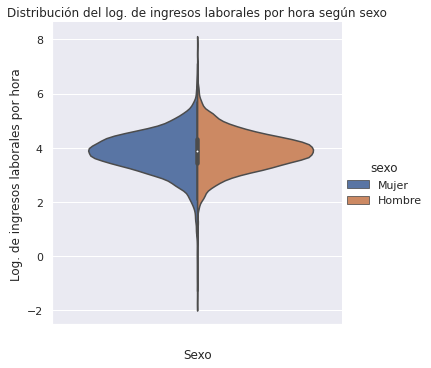

In [66]:
# Se crea una variable con valores vacios
df1['full'] = " "

# Gráfico de violín 
%matplotlib inline
fig4 = plt.figure()
ax = sns.catplot(data = df1, 
                 kind = 'violin',
                 x = 'full',
                 y = 'log_ingreso_laboral',
                 hue = 'sexo',
                 split = True)
ax.set(xlabel = 'Sexo', 
       ylabel = 'Log. de ingresos laborales por hora',
       title = 'Distribución del log. de ingresos laborales por hora según sexo')

### 5.1.3. Interpretación general de los resultados

<div class="alert alert-block alert-info">
<b>Los resultados muestran que:</b> 

- La población seleccionada se encuentra desbalanceada en términos de género.
- Cuando se calcula la distribución de la variable de ingresos por hora por género, visualmente no se detecta ningún tipo de sesgo hacia ninguno de estos.
- Lo anterior indica que, de existir algún tipo de sesgo en el mercado laboral, este podría explicarse por la cantidad de horas trabajadas, mas que por el nivel absoluto de salario. Lo cual lleva a dos hipótesis no excluyentes:
   - Que efectivamente exista discriminación a la entrada del mercado laboral contra las mujeres, que se resuelve en la oferta de puestos laborales con menor carga horaria (sub-empleo).
   - Que por parte de la demanda, las mujeres se autoseleccionen para tomar puestos de trabajos con menor carga horaria. De ser este el escenario, se habren otras dos hipótesis:
       - Que el mecanismo de discriminación provenga no del mercado laboral, sino de la organización de las tareas y cuidados de los  miembros del hogar, que al tener mayor peso sobre la mujer que sobre el hombre, sesgue la decisión de estas a tomar puestos laborales con menor carga horaria.
       - Que exista una decisión por parte de las mujeres a tomar puestos laborales con menor carga horaria. Este último escenario abre dos nuevas hipótesis:
           - Qué en términos del hogar exista un cálculo costo-beneficio en el que es más conveniente que el individuo que obtiene puestos con mayor carga horaria, trabaje más activamente. 
           - Qué refleje una cuestión de preferencias. Esto último abre dos hipótesis más:
               - Que las preferencias sean una decisión individual.
               - Que las preferencias estén moldeadas a nivel cultural (mandato) y el sesgo opere en dicho nivel.

Por supuesto, por cada escenario propuesto, pueden ocurrir combinaciones de comportamientos, tanto horizontalmente, como verticalmente.
</div>


In [67]:
# Limpieza de objetos creados
del bool_df1, df1_bool

## 5.2. Descripción de la población según nivel educativo

Al incorporarse dos categorías adicionales (terciario completo e incompleto) se modifica el gráfico de tortas realizado en EDA1, por otro de barras expresado en porcentaje.

### 5.2.1. Análisis gráfico

[Text(0.5, 0, 'Nivel educativo alcanzado'),
 Text(0.5, 1.0, 'Total de individuos por nivel educativo alcanzado')]

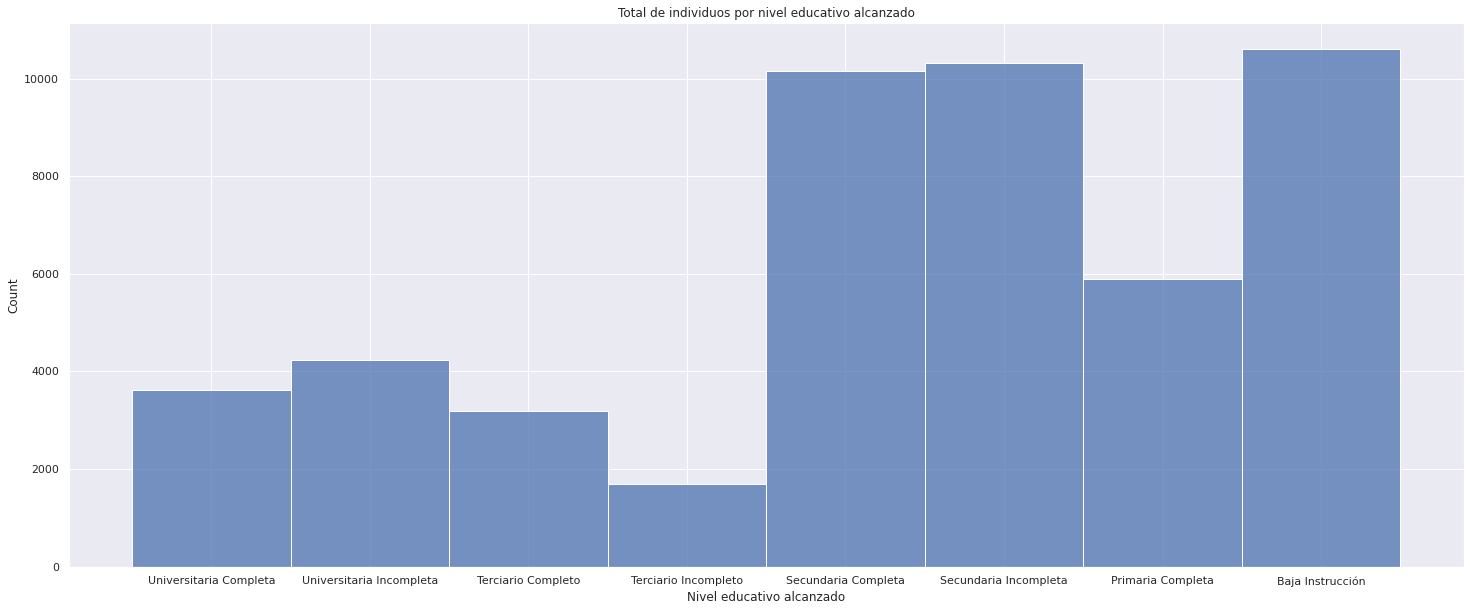

In [68]:
# Gráfico de barras
%matplotlib inline
fig5 = plt.figure(figsize = (25, 10))
ax = sns.histplot(data = df,
                 x = 'nivel_educ_obtenido3',
                 stat = 'count')
ax.set(xlabel = 'Nivel educativo alcanzado',
       title = 'Total de individuos por nivel educativo alcanzado')

### 5.2.1.2. Población seleccionada

Se muestra el porcentaje de la población con ingresos laborales positivos según la nueva clasificación de nivel de educación obtenido

In [69]:
# Sub-muestra
df1 = pd.DataFrame(data = df, columns = ['log_ingreso_laboral', 'sexo', 'nivel_educ_obtenido3'])

## Booleano
bool_df1 = pd.notnull(df1['log_ingreso_laboral'])
   
## Datos filtrados 
df1_bool = df1[bool_df1]

[Text(0.5, 0, 'Nivel educativo alcanzado'),
 Text(0.5, 1.0, 'Participación de individuos por nivel educativo alcanzado')]

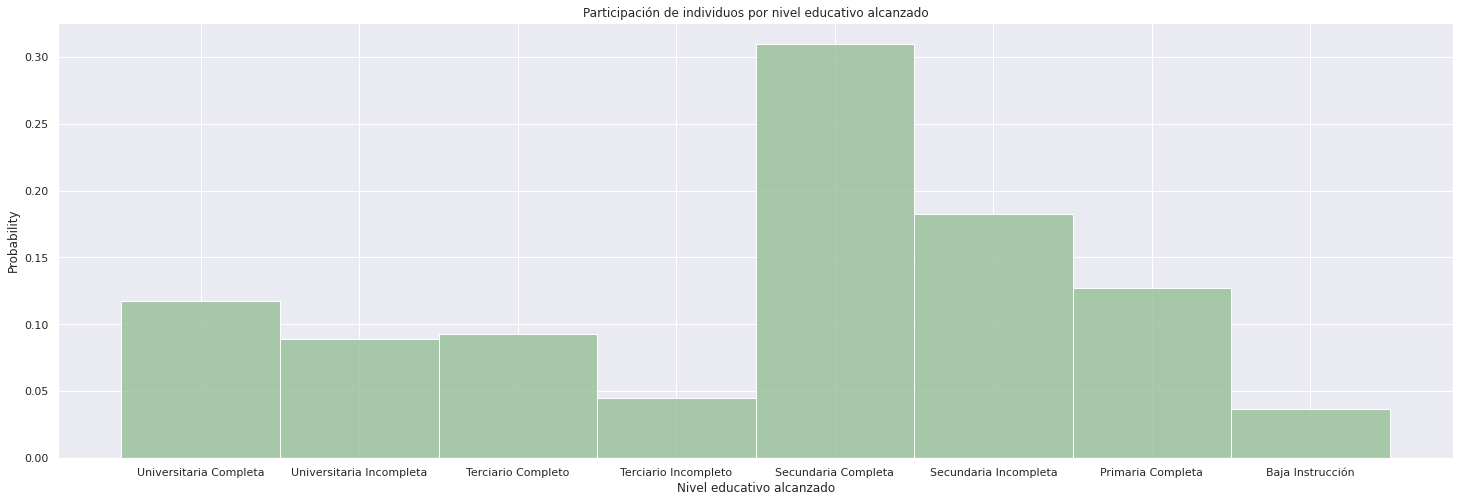

In [70]:
# Gráfico de barras
%matplotlib inline
fig6 = plt.figure(figsize = (25, 8))
ax = sns.histplot(data = df1_bool,
                 x = 'nivel_educ_obtenido3',
                 stat = 'probability',
                 color = 'darkseagreen')
ax.set(xlabel = 'Nivel educativo alcanzado',
       title = 'Participación de individuos por nivel educativo alcanzado')

### 5.2.2. Interpretación general de los resultados

<div class="alert alert-block alert-info">
<b>Los resultados muestran que:</b> 

El último gráfico muestra una relación interesante relacionada al sub-conjunto de individuos que se encuentran efectivamente trabajando y obteniendo un salario por ello. 
- Quienes obtuvieron secundaria completa representan un poco más de 30% de esta población, seguidos por aproximadamente 18% de personas con estudios secundario incompleto.
- Al discriminarse por estudios terciarios la participación de individuos con estudios universitarios (completos e incompletos) de la clasificación original disminuyen en su participación.
- La participación de individuos con estudios primarios imcompletos es mayor a la de individuos con estudios universitarios completos.
    
</div>

In [71]:
# Limpieza de objetos creados
del bool_df1, df1_bool

## 5.3. Relación entre nivel educativo alcanzado y el logaritmo del ingreso laboral por hora

### 5.3.1. Análisis previo

In [72]:
# Sub-muestra
df1 = pd.DataFrame(data = df, columns = ['log_ingreso_laboral', 'sexo', 'nivel_educ_obtenido3'])

## Booleano
bool_df1 = pd.notnull(df1['log_ingreso_laboral'])
   
## Datos filtrados 
df1_bool = df1[bool_df1]

### 5.3.2. Análisis gráfico

[Text(0, 0.5, 'Logaritmo del ingresos laboral real por hora'),
 Text(0.5, 0, 'Nivel educativo alcanzado'),
 Text(0.5, 1.0, 'Boxplot del logaritmo del ingresos laboral real por hora discriminado por nivel de estudios alcanzados')]

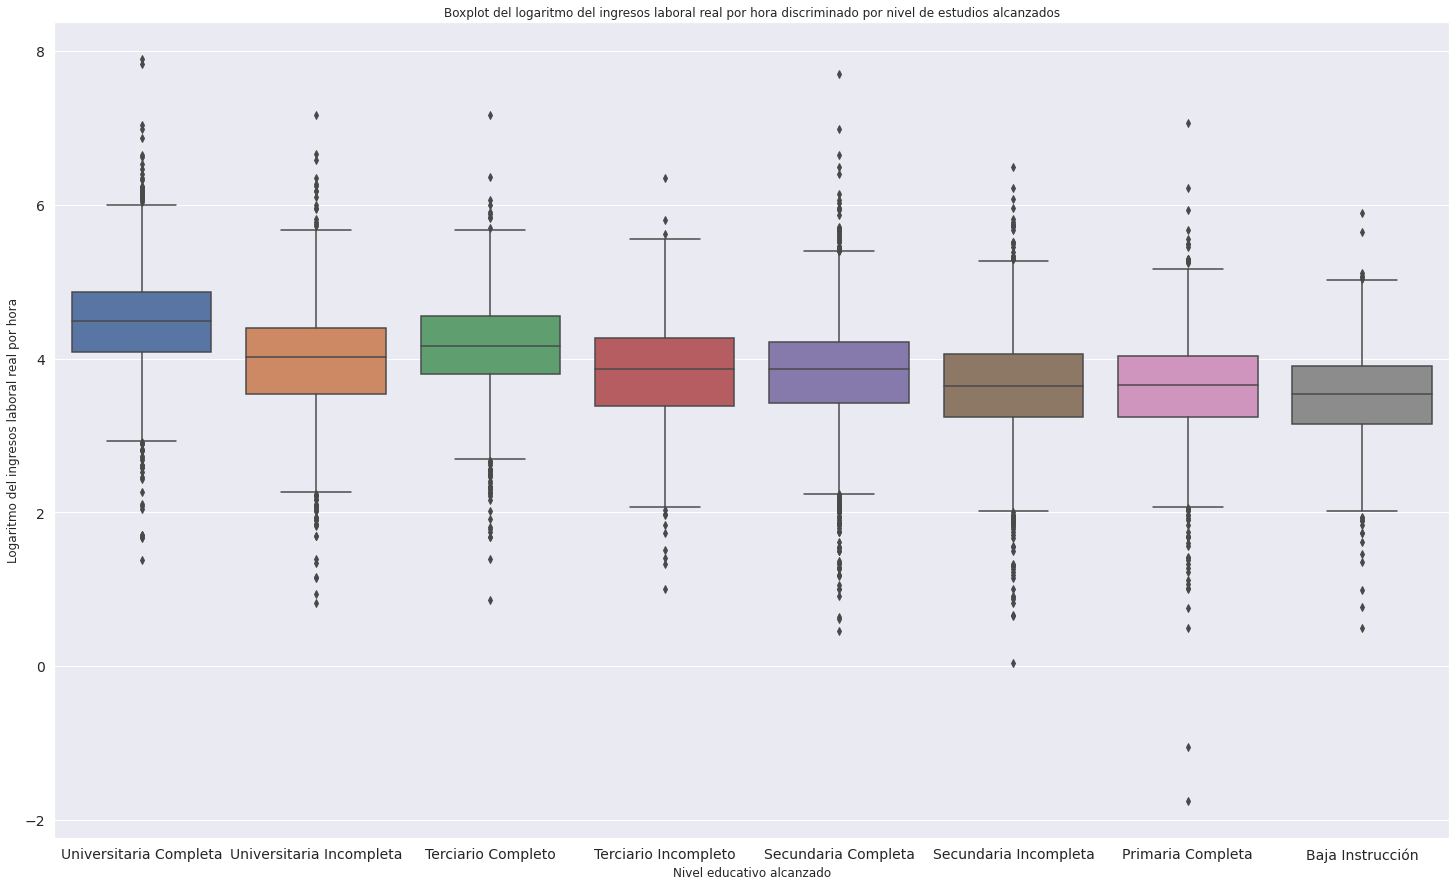

In [73]:
# Gráficos tipos boxplot
%matplotlib inline
fig7 = plt.figure(figsize = (25, 15))
ax = sns.boxplot(x = 'nivel_educ_obtenido3',
                 y = 'log_ingreso_laboral',
                 data = df1_bool,
                 orient = "v")
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set(xlabel = 'Nivel educativo alcanzado', 
       ylabel = 'Logaritmo del ingresos laboral real por hora',
       title = 'Boxplot del logaritmo del ingresos laboral real por hora discriminado por nivel de estudios alcanzados')

### 5.3.3. Interpretación general de los resultados

<div class="alert alert-block alert-info">
<b>Los resultados muestran que:</b> 

El gráfico anterior muestra una relación clara, aunque no excesivamente marcada entre la relación que se establece entre el nivel de estudios alcanzado y el salario por hora obtenido expresado en logaritmos.

Al depurarse del nivel de estudios terciario, los boxplot delos individuos con educación universitaria muestran un patrón similar en la presencia de outliers que en los demás niveles educativos, solo que estos se posicionan en niveles más altos, acorde a la tendencia general observada.
    
</div>


In [74]:
# Limpieza de objetos creados
del bool_df1, df1_bool

## 5.4. Relación el logaritmo del ingreso laboral por hora y la experiencia potencial

### 5.4.1. Análisis previo
El segundo componente del concepto de capital humano es la experiencia. Esta variable no se encuentra presente en el dataframe original, sino que fué creada tras las conclusiones del EDA1. En este apartado se realiza un análisis de la relación del nivel de ingreso laboral por hora y la experiencia potencial. A los fines de identificar si existe alguna tendencia reconocible, se separan los observaciones por nivel educativo.

<div class="alert alert-block alert-warning">
<b>PROBLEMA:</b> Se dispone de 8 niveles de educación obtenidos, lo que entorpece la lectura de los datos.
</div>

<div class="alert alert-block alert-success">
<b>SOLUCION:</b> Se crea un nuevo clasificador de nivel educativo, agrupando en las siguientes categorías:
   
- Alto
- Medio
- Bajo
</div> 

In [76]:
# Función para nueva clasificación
def niveleduc4(nivel):
    if (nivel == 'Baja Instrucción') | (nivel == 'Primaria Completa') | (nivel == 'Secundaria Incompleta'):
        return 'Bajo'
    if (nivel == 'Universitaria Completa') | (nivel == 'Universitaria Incompleta') | (nivel == 'Terciario Completo'):
        return 'Alto'
    return 'Medio'    

# Aplicación de la función
df['nivel_educ_obtenido4'] = df['nivel_educ_obtenido3'].map(niveleduc4)

# Dataframe y variables para análisis gráfico
df_exp = df[['exp', 'log_ingreso_laboral', 'nivel_educ_obtenido4', 'nivel_educ_obtenido3']]
df_exp_bajo = df_exp.where(df_exp['nivel_educ_obtenido4'] == 'Bajo')
df_exp_medio = df_exp.where(df_exp['nivel_educ_obtenido4'] == 'Medio')
df_exp_alto = df_exp.where(df_exp['nivel_educ_obtenido4'] == 'Alto')

### 5.4.2. Análisis gráfico

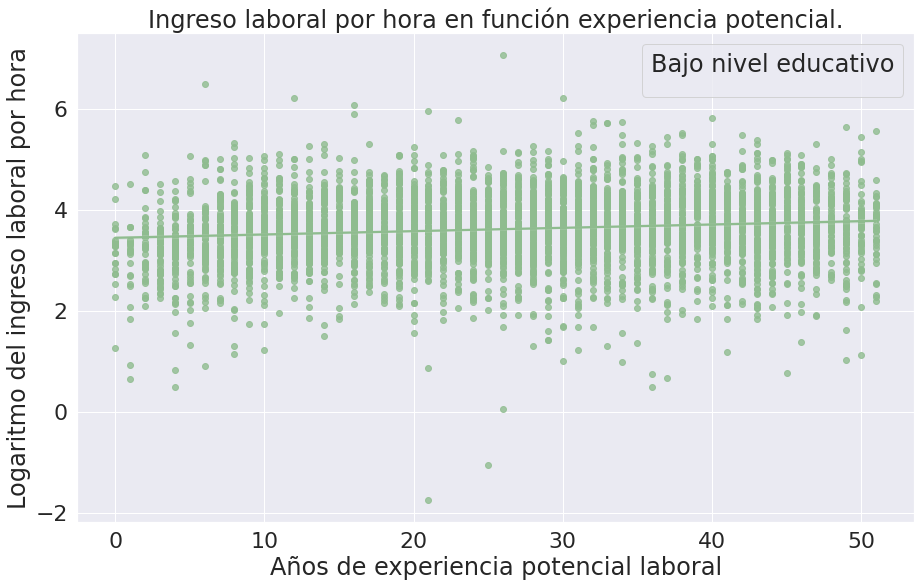

In [82]:
# Scaterplot 1: Bajo Nivel Educativo
%matplotlib inline
# pd.set_option('display.max_columns', None)


plt.figure(figsize = (15, 9))
ax = sns.regplot(data = df_exp_bajo,
                x = 'exp',
                y = 'log_ingreso_laboral',
                color = 'darkseagreen')

ax.set(xlabel = 'Años de experiencia potencial laboral',
       ylabel = 'Logaritmo del ingreso laboral por hora',
       title = 'Ingreso laboral por hora en función experiencia potencial.')

ax.legend(title = 'Bajo nivel educativo')
sns.set(font_scale=1)

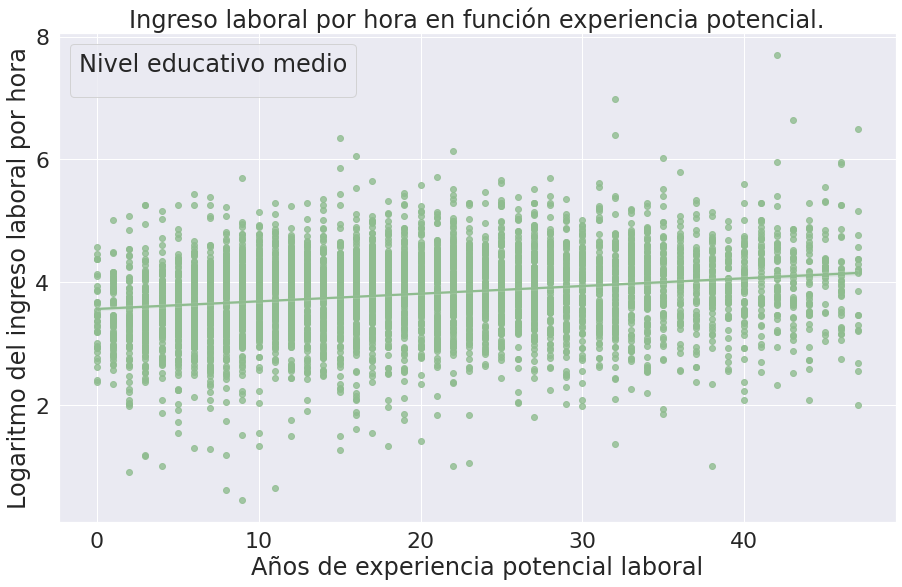

In [87]:
# Scaterplot 2: Nivel Educativo Medio
%matplotlib inline
plt.figure(figsize = (15, 9))

ax = sns.regplot(data = df_exp_medio,
                x ='exp',
                y = 'log_ingreso_laboral',
                color = 'darkseagreen')

ax.set(xlabel = 'Años de experiencia potencial laboral',
       ylabel = 'Logaritmo del ingreso laboral por hora',
       title = 'Ingreso laboral por hora en función experiencia potencial.')

ax.legend(title = 'Nivel educativo medio')
sns.set(font_scale=4)

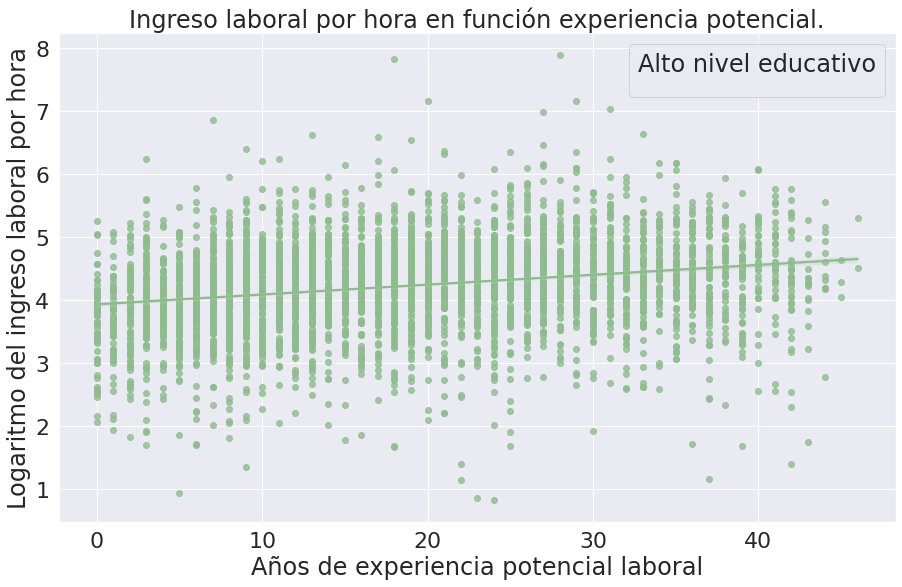

In [99]:
# Scaterplot 3: Alto Nivel Educativo
%matplotlib inline
plt.figure(figsize = (15, 9))

ax=sns.regplot(data = df_exp_alto,
                x = 'exp',
                y = 'log_ingreso_laboral',
                color = 'darkseagreen')

ax.set(xlabel = 'Años de experiencia potencial laboral',
       ylabel = 'Logaritmo del ingreso laboral por hora',
       title = 'Ingreso laboral por hora en función experiencia potencial.')

ax.legend(title = 'Alto nivel educativo')
sns.set(font_scale=1)

In [ ]:
# Limpieza de datos auxiliares
del df_exp, df_exp_bajo, df_exp_medio, df_exp_alto

### 5.4.3. Interpretación general de los resultados

<div class="alert alert-block alert-info">
<b>Los resultados muestran que:</b> 

- Cuando se controla por nivel educativo, se puede apreciar una tendencia levemente positiva (y volátil) entre los años de experiencia potencial y el ingreso laboral por hora.
- Asimismo, a medida que se sube de nivel educativo, dicha tendencia se acentúa. Esto indica que el rendimiento de la experiencia de un individuo más formado genera mayor rendimiento en términos de ingreso laboral.
</div>

## 5.5. Resumen general de insights obtenidos por EDA2

Los insights del análisis explotario sugieren que:

<div class="alert alert-block alert-info">

Los problemas detectados en el primer análisis explotario fueron solucionados:

- La distribución asimétrica del ingreso se incorpora mediante la transformación logarítmica de los ingresos laborales por hora.
- Considerar los ingresos laborales por hora, y no los absolutos, mejoran senciblemente las diferencias de género observadas.
- Se crearon clasificaciones de variables de educación que muestran explicitamente los niveles terciario completo e incompleto.
- Se crearon nuevas variables explicativas para los ingresos laborales por hora.

Sin embargo, la utilización de nuevas variables abren nuevos insights a tener en cuenta:

- La información parece sugerir que las diferencias salariales por género, no ocurren solo en el mercado, sino en el ámbito de la decisión previa a insertarse en el mismo. Es decir, en los hogares. De existir algún tipo de sesgo en el mercado laboral, este podría explicarse por la cantidad de horas trabajadas, mas que por el nivel absoluto de salario. Lo cual lleva a dos hipótesis no excluyentes:
   - Que efectivamente exista discriminación a la entrada del mercado laboral contra las mujeres, que se resuelve en la oferta de puestos laborales con menor carga horaria (sub-empleo).
   - Que por parte de la demanda, las mujeres se autoseleccionen para tomar puestos de trabajos con menor carga horaria. De ser este el escenario, se habren otras dos hipótesis:
       - Que el mecanismo de discriminación provenga no del mercado laboral, sino de la organización de las tareas y cuidados de los  miembros del hogar, que al tener mayor peso sobre la mujer que sobre el hombre, sesgue la decisión de estas a tomar puestos laborales con menor carga horaria.
       - Que exista una decisión por parte de las mujeres a tomar puestos laborales con menor carga horaria. Este último escenario abre dos nuevas hipótesis:
           - Qué en términos del hogar exista un cálculo costo-beneficio en el que es más conveniente que el individuo que obtiene puestos con mayor carga horaria, trabaje más activamente. 
           - Qué refleje una cuestión de preferencias. Esto último abre dos hipótesis más:
               - Que las preferencias sean una decisión individual.
               - Que las preferencias estén moldeadas a nivel cultural (mandato) y el sesgo opere en dicho nivel.

En cuanto a la composición de la población por nivel de educación, los valores parecen sugerir baja acumulación de capital humano, y baja calificación laboral, debido a:  
- Quienes obtuvieron secundaria completa representan un poco más de 30% de esta población, seguidos por aproximadamente 18% de personas con estudios secundario incompleto.
- Al discriminarse por estudios terciarios la participación de individuos con estudios universitarios (completos e incompletos) de la clasificación original disminuyen en su participación.
- La participación de individuos con estudios primarios imcompletos es mayor a la de individuos con estudios universitarios completos.
- Al incorporarse los niveles terciarios en el análisis, se identifica el patrón de que a mayor nivel de estudios, mayor ingreso laboral.
    
Cuando se analiza el otro componente de capital humano, la experiencia potencial del individuo, se obtiene que:
- Cuando se controla por nivel educativo, se puede apreciar una tendencia levemente positiva (y volátil) entre los años de experiencia potencial y el ingreso laboral por hora.
- Asimismo, a medida que se sube de nivel educativo, dicha tendencia se acentúa. Esto indica que el rendimiento de la experiencia de un individuo más formado genera mayor rendimiento en términos de ingreso laboral.
    
</div>

***
# 6. Modelos de regresión
# 6.1. Feature engineering

El modelo de regresión que se utilizará para la estimación empírica de los retornos a la educación de este trabajo se basa en la denominada ecuación de Mincer, que proviene de la literatura económica. La misma propone que el ingreso laboral depende de la acumulación de capital humano de un individuo. En el caso del modelo que se propone en este trabajo:

- Nivel educativo alcanzado
- Experiencia potencial acumulada

Asimismo, en el último lustro la literatura insiste en la presencia de diferencias sistemáticas en los diferenciales de salarios por cuestiones de género. Si bien la variable de género nada dice sobre diferencias de capital humano, a los fines de resolver el problema propuesto en este trabajo, se la incluye deliveradamente.

En términos generales, el modelo de regresión que se  forma funcional: 

$$ ln(w_i) = \alpha_i + \beta E_i + \gamma x_i + \delta x_i^2 + \theta s_i + rX_i + \mu_i $$

Donde:
- $w_i$ es el logaritmo del ingreso laboral por hora individuo $i$ por período.
- $\alpha_i$ es la constante.
- $E_i$ es una medida del máximo nivel de educación alcanzado.
- $x_i$ es una medida de experiencia laboral.
- $x_i^2$ concavidad del perfil de ingresos a lo largo de su vida de un individuo en relación a su experiencia.
- $s_i$ variable de género.
- $X_i$ es un conjunto de variables socio-demográficas y del tipo de vinculación del individuo con el mercado laboral que afectan a los ingresos, distintas de la experiencia y la educación.
- $\mu_i$ es el término de perturbación aleatoria que representa a todas aquellas variables no observables que afectan los ingresos de los individuos y que no están explícitamente incorporadas en la expresión.

Para los fines de este trabajo, se utilizará el método de *feature selección* para identificar el conjunto de las variables control $X_i$

Asimismo, a los fines de no contabilizar valores extremos la regresión se correrá para el conjunto de individuos que se encuentren en el rango de edad legal para trabajar. Esto es entre los 15 a los 65 años, inclusive.

### 6.1.1. Librerías

In [ ]:
# Para forward selection
import statsmodels.api as sm
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

### 6.1.2. Condicionamiento de instancias
A los fines de no contabilizar valores extremos la regresión se correrá para el conjunto de individuos que se encuentren en el rango de edad legal para trabajar. Esto es entre los 15 a los 65 años, inclusive.

In [ ]:
# Booleano
bool_edad = ((df['edad'] >= 15) & (df['edad'] <= 65))
   
# Datos filtrados por rango etario. Dataframe a ser utilizado para correr el modelo.
df_rango = df[bool_edad]

# Limpieza de objetos
del bool_edad

# Dimensiones
df_rango.shape

(33316, 355)

### 6.1.3. Condicionamiento de features

<div class="alert alert-block alert-warning">
<b>PROBLEMAS:</b>
    
- No todas los tipos de variables son relevantes para realizar _feature engineering_, por lo tanto deben ser eliminadas.
- Las variables de tipo objeto necesitan ser convertidas a dummies para poder ser procesadas por el algoritmo de selección.
</div>    


<div class="alert alert-block alert-success">
<b>SOLUCION:</b> 
Para realizar la selección de variables a ser eliminadas se recurrió al manual de la base de datos <a href="https://drive.google.com/file/d/1BQJ5fBfQVwHnjdFK5JZslyY-r_s8wKgW/view?usp=sharing">EPH-Observatorio</a>, y el proceso de interpretación quedó plasmado en el archivo <a href="https://docs.google.com/spreadsheets/d/1AA-GHjHvdzL0pj_CqhcsIM5wNSU-lQVN/edit?usp=sharing&ouid=115098086317258097170&rtpof=true&sd=true">tipos.xlsx</a>.
</div> 


#### 6.1.3.1. Eliminación de variables originales
Se seleccionaron para su elimación:
- Características identificatorias.
- Ponderadores de expansión de la muestra.
- Clasificadores decílicos.
- Variables ya utilizadas en las transformaciones anteriores.
- Características que responden a clasificadores extensos.

In [ ]:
df_rango = df_rango.drop(['Unnamed: 0', 
                    'codusu', 
                    'nro_hogar', 
                    'id_hogar', 
                    'realizada', 
                    'anio', 
                    'trimestre', 
                    'region', 
                    'mas_500', 
                    'aglomerado', 
                    'pondera', 
                    'entrevista', 
                    'decifr', 
                    'idecifr', 
                    'rdecifr', 
                    'gdecifr', 
                    'pdecifr', 
                    'adecifr', 
                    'deccfr', 
                    'ideccfr', 
                    'rdeccfr', 
                    'gdeccfr', 
                    'pdeccfr', 
                    'adeccfr', 
                    'pondih', 
                    'sexo', 
                    'nivel_educ_cursado', 
                    'lugar_nacimiento', 
                    'otro_lugar_nacimiento', 
                    'pais_nacimiento', 
                    'subcontinente_nacimiento', 
                    'continente_nacimiento', 
                    'lugar_residencia', 
                    'otro_lugar_residencia', 
                    'pais_residencia', 
                    'subcontinente_residencia', 
                    'continente_residencia', 
                    'nivel_educ_obtenido', 
                    'condicion_actividad', 
                    'categoria_ocupacional', 
                    'imputado', 
                    'horas_ocupacion_principal_semana', 
                    'codigo_actividad', 
                    'division_ocupado', 
                    'seccion_ocupado', 
                    'codigo_ocupacion', 
                    'caracter_ocupado', 
                    'calificacion_ocupado', 
                    'codigo_desocupado', 
                    'division_desocupado', 
                    'seccion_desocupado', 
                    'codigo_ocupacion_desempleado', 
                    'caracter_desocupado', 
                    'calificacion_desocupado', 
                    'ingreso_ocupacion_principal', 
                    'ingreso_real_ocupacion_principal', 
                    'decocur', 
                    'idecocur', 
                    'rdecocur', 
                    'gdecocur', 
                    'pdecocur', 
                    'adecocur', 
                    'pondiio', 
                    'decindr', 
                    'idecindr', 
                    'rdecindr', 
                    'gdecindr', 
                    'pdecindr', 
                    'adecindr', 
                    'pondii', 
                    'id_persona'], 1)

df_rango.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_10576\2340865313.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rango = df_rango.drop(['Unnamed: 0',


(33316, 284)

#### 6.1.3.2. Eliminación de variables elaboradas en este proyecto
Se eliminan variables:
- Altamente correlacionadas con las variables de interés obtenidas en las transformaciones.
- Variables que son de interés y que explicitamente van a inclui

In [ ]:
df_rango = df_rango.drop(['ingreso_laboral',                   # Corr. con la variable objetivo
                    'ingreso_real_total_individual',           # Corr. con la variable objetivo
                    'horas_trabajadas',                        # Corr. con la variable objetivo
                    'ingreso_laboral_real',                    # Corr. con la variable objetivo
                    'ingreso_laboral_real_porhora',            # Corr. con la variable objetivo  
                    'nivel_educ_obtenido2',                    # Corr. con variables educativas
                    'nivel_educ_obtenido3',                    # Corr. con variables educativas
                    'nivel_educ_obtenido4',                    # Corr. con variables educativas
                    'condicion_formalidad',                    # Corr. con formal y no formal
                    'anio_aprobado',                           # Corr. con experiencia
                    'anios_educ',                              # Corr. con experiencia
                    'edad',                                    # Corr. con experiencia
                    'calificacion'], 1)                        # Corr. con las dummies de calificación         

df_rango.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_10576\2100566491.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rango = df_rango.drop(['ingreso_laboral',                   # Corr. con la variable objetivo


(33316, 271)

#### 6.1.3.3. Eliminación de variables de ingreso nominal
Se eliminan todas las variables de ingreso nominal, para dejar solo aquellas que corresponden a ingresos reales. Es decir, deflactados.

In [ ]:
df_rango = df_rango.drop(['ingreso_familiar', 
                    'ingreso_capita_familiar', 
                    'ingreso_duenio_sin_socio', 
                    'ingreso_duenio_con_socio', 
                    'cobro_sueldo', 
                    'cobro_tickets', 
                    'cobro_comision', 
                    'cobro_propina', 
                    'cobro_aguinaldo', 
                    'cobro_otro', 
                    'cobro_retroactivo', 
                    'ingreso_otras_ocupaciones', 
                    'ingreso_total_individual', 
                    'ingreso_jubilacion', 
                    'ingreso_indemnizacion', 
                    'ingreso_seguro_desempleo', 
                    'ingreso_subsidio', 
                    'ingreso_alquiler', 
                    'ingreso_negocio', 
                    'ingreso_renta', 
                    'ingreso_beca', 
                    'ingreso_cuota_alimentaria', 
                    'ingreso_otro', 
                    'ingreso_menores', 
                    'ingreso_aguinaldo', 
                    'ingreso_no_laborable'], 1)

df_rango.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_10576\3326244174.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rango = df_rango.drop(['ingreso_familiar',


(33316, 245)

#### 6.1.3.4. Eliminación de no convertibles a dummies
Se eliminan las variables que amplian las respuestas libres de los encuestados, con origen en la ampliación de una respuesta de tipo **otro** en algunas de las preguntas de la encuesta, o las que tienen algún rango **especial**.

In [ ]:
df_rango = df_rango.drop(['otro_tipo_vivienda',
                          'otro_tipo_piso',
                          'otro_tipo_piso',
                          'otro_suministro_agua',
                          'otro_regimen_tenencia',
                          'otro_combustible_cocina',
                          'nacimiento',
                          'lugar_trabajo_gba_esp',
                          'lugar_trabajo_prov_esp',
                          'caracter'], 1)

df_rango.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_10576\3310678500.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rango = df_rango.drop(['otro_tipo_vivienda',


(33316, 236)

### 6.1.4. Creación de variables dummies para las variables tipo objeto
#### 6.1.4.1. Creación de las variables

In [ ]:
# Identificación de las variables tipo objeto
var_objetos = df_rango.select_dtypes(object).columns

# Conversión de las variables tipo objeto a dummies
for i in var_objetos:
    df_rango = pd.get_dummies(df_rango, columns = [i])

df_rango.shape

(33316, 666)

#### 6.1.4.2. Limpieza de las variables dummies no informativas de las respuestas
Se eliminan las respuestas de tipo:
- No corresponde.
- No sabe, no responde (Ns/Nr)

In [ ]:
# Identificación
no_corresponde = df_rango.filter(regex = '_No corresponde').columns
no_sabe = df_rango.filter(regex = '_Ns/Nr').columns
filtro = no_corresponde.union(no_sabe)

# Eliminación
df_rango = df_rango.drop(filtro, 1)

# Dimensiones de la base
df_rango.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_10576\3714210655.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rango = df_rango.drop(filtro, 1)


(33316, 527)

#### 6.1.4.3. Renombrado de dummies con espaciado en la label

In [ ]:
# Renombrado de variables
df_rango.rename(columns = {'cobertura_salud_No paga':'cobertura_salud_NoPaga'}, 
          inplace = True)

In [ ]:
# limpieza de objetos
del df1, var_objetos, no_sabe, no_corresponde, i, filtro, 

### 6.1.5. Adecuación de valores Nan

<AxesSubplot:>

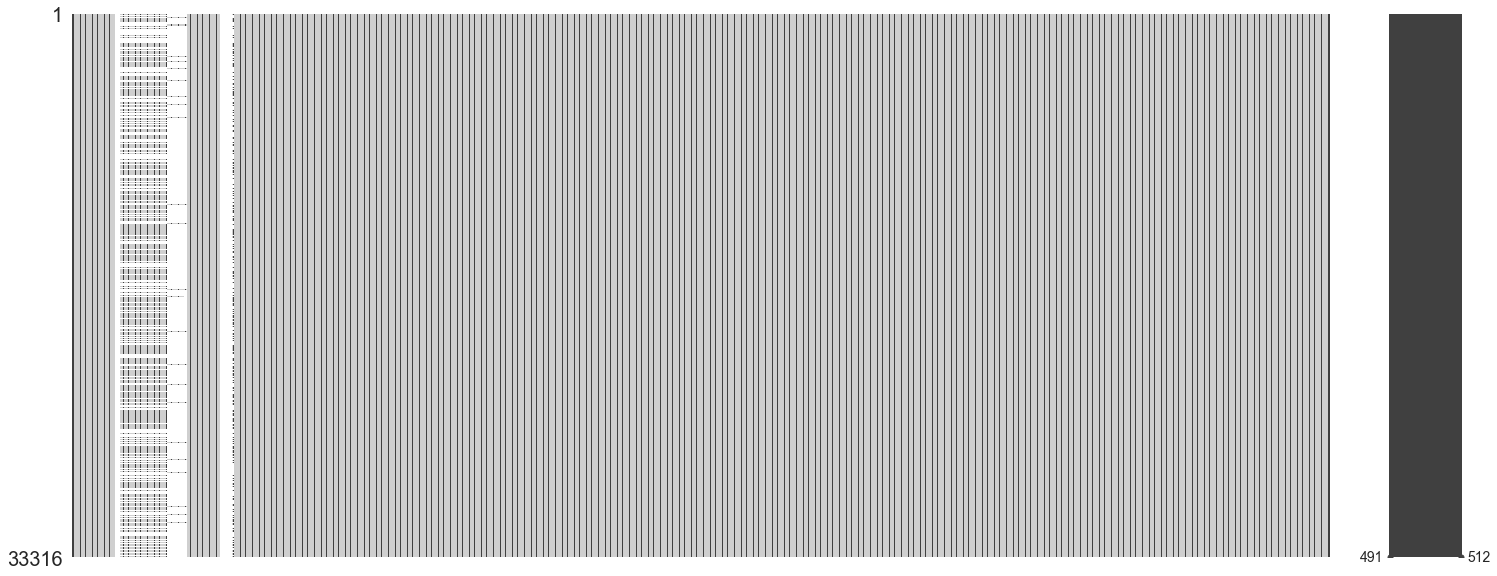

In [ ]:
# Evidencia de los datos tipo nan
msno.matrix(df_rango)  

Como se puede observar, las transformaciones realizadas en este apartado y los anteriores, han permitido una enorme mejoría con respecto al grafico anterior (sección 4.2) basado en la base original. En otras palabras, ya en la instancia previa al tratamiento de valores NaNs se observa una disminucion significativa de datos faltantes (blancos).

#### 6.1.5.1. Depuración de la variable objetivo

In [ ]:
# Se borran las instancias con valores NaN de la variable objetivo.
## Las mismas van a ser ignoradas por el algoritmo de regresión.
df_rango = df_rango.dropna(subset = ['log_ingreso_laboral'])

# Dimensiones de la base
df_rango.shape

(15145, 527)

#### 6.1.5.2. Variables que incluyen en su totalidad valores NaN

In [ ]:
# Conteo de la cantidad total de instancias
filas_rango = df_rango.shape[0]
filas_rango

15145

In [ ]:
# Matriz de features que incluyen en su totalidad valores NaN
columnas_rango = df_rango.isnull().sum()
columnas_rango = pd.DataFrame(data = columnas_rango, columns = ['Total'])
columnas_rango['Borrar'] = (columnas_rango['Total'] == filas_rango)
columnas_rango = columnas_rango.drop(columnas_rango.index[columnas_rango['Borrar'] == False])
columnas_rango

,Total,Borrar
subsistencia,15145,True
no_escolar,15145,True
meses_trabajo_desocupado,15145,True
anios_trabajo_desocupado,15145,True
dias_trabajo_desocupado,15145,True
antiguedad_ocup_anterior,15145,True
anios_trabajo_cont_desocupado,15145,True
meses_trabajo_cont_desocupado,15145,True
dias_trabajo_cont_desocupado,15145,True
trabajo_cont_ocupacion_anterior,15145,True


In [ ]:
# Identificación de las features anteriores
eliminables = columnas_rango.index
eliminables

Index(['subsistencia', 'no_escolar', 'meses_trabajo_desocupado',
       'anios_trabajo_desocupado', 'dias_trabajo_desocupado',
       'antiguedad_ocup_anterior', 'anios_trabajo_cont_desocupado',
       'meses_trabajo_cont_desocupado', 'dias_trabajo_cont_desocupado',
       'trabajo_cont_ocupacion_anterior', 'nbi', 'nbi_2', 'nbi_3', 'nbi_4',
       'nbi_5'],
      dtype='object')

In [ ]:
# Eliminación de las features identificadas del dataframe
df_rango = df_rango.drop(columns = eliminables)
df_rango.shape

(15145, 512)

In [ ]:
# Limpieza de objetos auxiliares
del columnas_rango, eliminables, filas_rango

#### 6.1.5.3. Otras variables con valores NaN

In [ ]:
# Finalmente, se reemplazan los valores NaN no tratados por 0 
df_rango = df_rango.replace(np.nan, 0)

<AxesSubplot:>

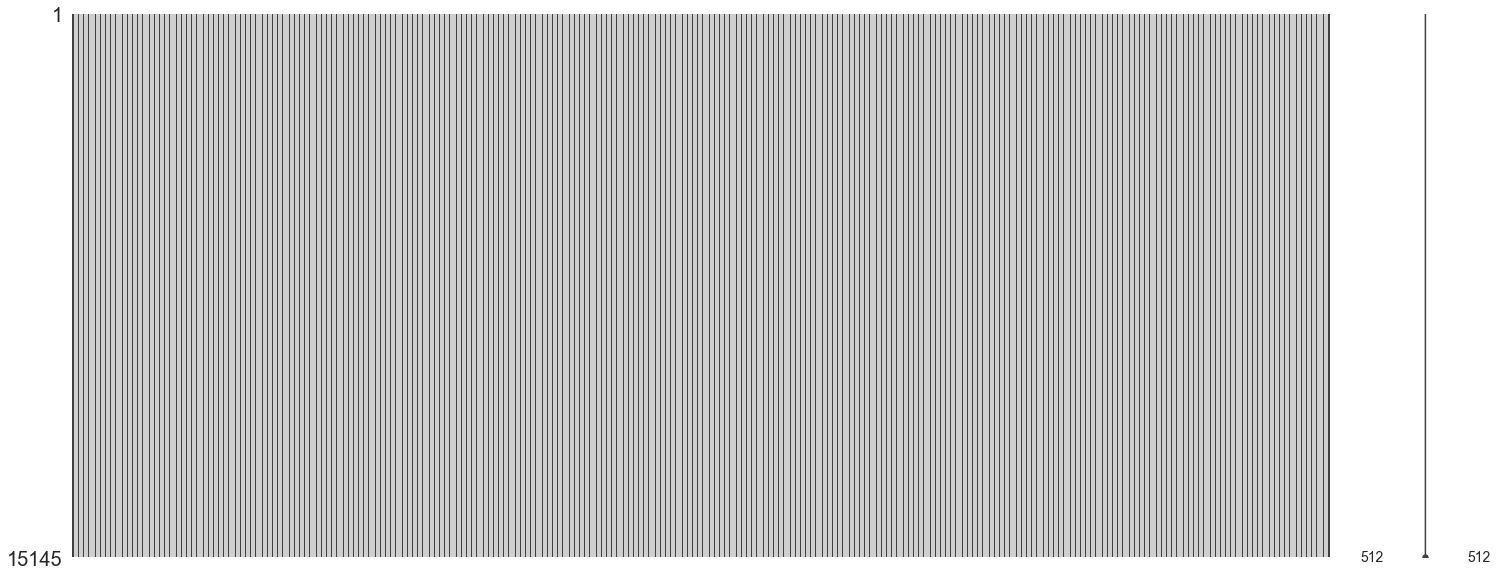

In [ ]:
# Chequeo final de valores NaNs
msno.matrix(df_rango)

Como se puede observar en el gráfico anterior, a diferencia de lo analizado en las secciones 4.2 y 6.1.5, el dataframe transformado no presenta datos faltantes.

### 6.1.6. Reporte automático de la base de datos depurada

Con el comando siguiente se crea un reporte automático de base de datos depurada. Dado que el código insume aproximadamente una hora de procesamiento se deja disponible para consulta el archivo html correspondiente, denominado [output](https://drive.google.com/file/d/1Ytwcm2bBARs8Qc7tW-2-4u_vYCKVzGOu/view?usp=sharing) 

In [ ]:
# Creación del reporte automático
## profile = ProfileReport(df_rango)

# Exportación del reporte
## profile.to_file(output_file="output.html")

### 6.1.7. Identificación de la variable objetivo (y)

In [ ]:
# Característica objetivo
y = df_rango['log_ingreso_laboral']

### 6.1.8. Identificación de la matriz de características (X)
Se quita no solo la variable objetivo, sino que también se seleccionan aquellas que el cáclulo de regresión quita para evitar combinanciones lineales de variables. Es decir:
- Niveles educativos
- Genero


En este sentido, el *feature selección* se utiliza como una estrategia de selección de variables de control. 

In [ ]:
# Matriz de características
X = df_rango.drop(# Variable objetivo ----------
                  ['log_ingreso_laboral',
                  # Variables de género --------        
                  'hombre',
                  # Variables educativas -------
                  'primaria_incompleta',
                  'sin_instruccion',
                  'baja_instruccion'], 1)

C:\Users\PC\AppData\Local\Temp\ipykernel_10576\920255854.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_rango.drop(# Variable objetivo ----------


### 6.1.9. Aplicación del método de selección
#### 6.1.9.1. Con función de selección

In [ ]:
def stepwise_selection(data, target, SL_in = 0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

**NOTA** Se cancela el método en el Kernel de este código porque insume aproximadamente 35' de procesamiento.

Las variables seleccionadas bajo este método se muestran en el archivo [elegidas](https://drive.google.com/file/d/1ANEXgtJ9Uv9fDfkhQcs0E8XdIRJHeU7C/view?usp=sharing). La cantidad de features seleccionas con este método lo hacen inviable para una selección más acotada.

El código figura a continuación:

In [ ]:
# Features seleccionadas por stepwise (quitar el # a las lineas siguientes de este chunk)

# elegidas = stepwise_selection(X, y)
# elegidas

#### 6.1.9.2. Implementando funciones de Python

In [ ]:
# Modelo Sequential Forward Selection (SFS)
sfs = SFS(LinearRegression(),
          k_features = 24,
          forward = True,
          floating = True,
          fixed_features = (# Variables de género --------
                            'mujer',           
                            # Variables educativas -------
                            'primaria_completa',               
                            'secundaria_completa',
                            'secundaria_incompleta',
                            'terciario_completo',
                            'terciario_incompleto',
                            'universitario_completo',
                            'universitario_incompleto',
                            # Variables de experiencia ----
                            'exp',
                            'exp2'),
          scoring = 'r2',
          cv = 20)

In [ ]:
# Lista final de features (anulada para no retardar tiempo de procesamiento)

# sfs.fit(X, y)
# sfs.k_feature_names_

# Salida del código anterior
Image(url='https://drive.google.com/uc?id=1EHAkgndEfC3rWXQU6yraAYh3MDAzpQKg')

## 6.2. Modelos de regresión

In [ ]:
# Librerias para modelo básico de regresión 
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py

# Librerías para algoritmos de selección de instancias
from sklearn.model_selection import train_test_split

# Librerías para algoritmo de regresión con selección de instancias
from sklearn.linear_model import LinearRegression

# Librerías para cálculo de métricas para entrenamiento de modelos
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Fijación de semilla para comparación de cálculos aleatorios
SEED = 17

### 6.2.1. Modelo teórico básico

En esta sección, se estima la relación básica de la ecuación de Mincer sin controles. Es decir:

$$ ln(w_i) = \alpha_i + \beta E_i + \gamma x_i + \delta x_i^2 + \theta s_i + \mu_i $$

#### 6.2.1.1. Estimación OLS sin entrenamiento

In [ ]:
# Selección de variables
objetivo = 'log_ingreso_laboral ~ '
educativas = 'universitario_completo + universitario_incompleto + terciario_completo + terciario_incompleto + secundaria_completa + secundaria_incompleta + primaria_completa + '
experiencia = 'exp + exp2 + '
genero = 'mujer'

In [ ]:
# Modelo 1: Teórico básico
modelo1 = objetivo + educativas + experiencia + genero

lm1 = sm.ols(formula = modelo1, 
             data = df_rango).fit()
print(lm1.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_laboral   R-squared:                       0.192
Model:                             OLS   Adj. R-squared:                  0.191
Method:                  Least Squares   F-statistic:                     359.5
Date:                 Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                         18:19:31   Log-Likelihood:                -14863.
No. Observations:                15145   AIC:                         2.975e+04
Df Residuals:                    15134   BIC:                         2.983e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

#### 6.2.1.2. Estimación con entrenamiento y métricas
##### 6.2.1.2.1. Variables del modelo

Se filtran las variables independientes de interés para correr la regresion, como así también la variable objetivo:

*   educativas = universitario_completo, universitario_incompleto, terciario_completo, terciario_incompleto, secundaria_completa, secundaria_incompleta, primaria_completa.
*   experiencia = exp, exp2
*   genero = mujer

In [ ]:
# Selección de variables
X1 = df_rango[[# Educativas --------------
               'universitario_completo',
               'universitario_incompleto',
               'terciario_completo',
               'terciario_incompleto',
               'secundaria_completa',
               'secundaria_incompleta',
               'primaria_completa',
               # Género ----------------
               'mujer',
               # Experiencia potencial--
               'exp',
               'exp2']]

# Variable objetivo
Y1 = df_rango[['log_ingreso_laboral']]

##### 6.2.1.2.2. Selección de observaciones para entrenamiento y testeo

In [ ]:
# Algoritmo de selección de instancias
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, Y1, test_size = 0.3, random_state = SEED)

##### 6.2.1.2.3. Ajuste del modelo

In [ ]:
# Modelo
lr_1 = LinearRegression()

# Ajuste del modelo
lr_1.fit(X_train_1,y_train_1)

# Predicción de resultados
y_pred_1 = lr_1.predict(X_test_1)

In [ ]:
# Valor del intercepto
print('Intercepto:', lr_1.intercept_)

# Valores de los coeficientes
nombre_feature1 = X1.columns
lr_1_coeficientes = lr_1.coef_
lr_1_coeficientes.shape = (10, 1)

coeficientes1 = pd.DataFrame(data = lr_1_coeficientes, 
                             index =  nombre_feature1,
                            columns = ['Valor de los coeficientes'])
print(coeficientes1)

Intercepto: [3.05323989]
                          Valor de los coeficientes
universitario_completo                     1.114425
universitario_incompleto                   0.672821
terciario_completo                         0.761348
terciario_incompleto                       0.477770
secundaria_completa                        0.417128
secundaria_incompleta                      0.212270
primaria_completa                          0.107103
mujer                                     -0.140079
exp                                        0.031232
exp2                                      -0.000427


##### 6.2.1.2.4. Cálculo de las métricas

In [ ]:
# Error Absoluto Medio
print("MAE", mean_absolute_error(y_test_1, y_pred_1).round(4))

MAE 0.4831


In [ ]:
# Error cuadratico medio
print("MSE", mean_squared_error(y_test_1, y_pred_1).round(4))

MSE 0.4029


In [ ]:
# Error cuadratico medio
print("RMSE", np.sqrt(mean_squared_error(y_test_1, y_pred_1)).round(4))

RMSE 0.6347


In [ ]:
# Error cuadratico medio con escala logarítmica
print("RMSE Log", np.log(np.sqrt(mean_squared_error(y_test_1, y_pred_1))).round(4))

RMSE Log -0.4546


In [ ]:
# R-Cuadrado
r2_1 = r2_score(y_test_1,y_pred_1)
print("R^2", r2_1.round(4))

R^2 0.1864


##### 6.2.1.2.5. Conclusiones en base a las métricas

El cuadro siguiente muestra un resumen de las métricas calculadas para el modelo 1 (M1). Como se puede observar:

- El error absoluto medio (**MAE**) pondera la diferencia con los errores de manera lineal. Como se puede observar en tabla, el mismo no difiere marcadamente del MSE, lo que indica que las diferencias entre valores reales y predichos no es fuerte
- Que el error cuadrático medio (**MSE**) sea menor que 1, puede estar implicando que se esté subestimando la maldad del modelo 1. Dado que **RMSE** es solo la raíz cuadrada de MSE, lo mismo aplica para esta métrica.
- Sin embargo, la bondad de ajuste del modelo dada por el R-Cuadrado (**R^2**) es relativamente baja. Este resultado es esperable, si te tiene en cuenta que el M1 no incluye variables de control.

| Métrica | Valor M1|
| :- | :-: |
| MAE | 0.483 |
| MSE | 0.4029 |
| RMSE | 0.6347 |
| RMSE Log | -0.4546 |
| R^2 | 0.1864 |


### 6.2.2. Modelo teórico con controles seleccionados sin feature engineering

En esta sección se estima el modelo teórico con controles.

$$ ln(w_i) = \alpha_i + \beta E_i + \gamma x_i + \delta x_i^2 + \theta s_i + rX_i + \mu_i $$

Las variables seleccionadas para control, son las identificadas en secciones anteriores. A saber:
- Trabajo formal o informal
- Región del país donde vide el individuo
- Grado de calificación del individuo

#### 6.2.2.1. Estimación OLS sin entrenamiento

In [ ]:
# Selección de variables
## Ecuación de Mincer
objetivo = 'log_ingreso_laboral ~ '
educativas = 'universitario_completo + universitario_incompleto + terciario_completo + terciario_incompleto + secundaria_completa + secundaria_incompleta + primaria_completa + '
experiencia = 'exp + exp2 + '
genero = 'mujer + '
## Controles
condicion_formalidad = 'informal + '
region = 'CUYO + GBA + NOA + PAMPEANA + PATAGONIA + '
calificacion = 'profesional + tecnico + operativo'

In [ ]:
modelo2 = objetivo + educativas + experiencia + genero + condicion_formalidad + region + calificacion

lm2 = sm.ols(formula = modelo2, 
             data = df_rango).fit()
print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_laboral   R-squared:                       0.314
Model:                             OLS   Adj. R-squared:                  0.313
Method:                  Least Squares   F-statistic:                     364.1
Date:                 Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                         18:19:31   Log-Likelihood:                -13625.
No. Observations:                15145   AIC:                         2.729e+04
Df Residuals:                    15125   BIC:                         2.744e+04
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

#### 6.2.2.2. Estimación con entrenamiento y métricas
##### 6.2.2.2.1. Variables del modelo

A las variables independientes anteriores se les agregan las siguientes:

*   condicion_formalidad: informal 
*   region: CUYO, GBA, NOA, PAMPEANA, PATAGONIA
*   calificacion: profesional, tecnico, operativo

In [ ]:
# Selección de variables
X2 = df_rango[[# Educativas ----------------
               'universitario_completo',
               'universitario_incompleto',
               'terciario_completo',
               'terciario_incompleto',
               'secundaria_completa',
               'secundaria_incompleta',
               'primaria_completa',
               # Género --------------------
               'mujer',
               # Experiencia potencial -----
               'exp',
               'exp2',
               # Nivel de informalidad laboral ---
               'informal',
               # Geográficas --------------------
               'CUYO',
               'GBA',
               'NOA',
               'PAMPEANA',
               'PATAGONIA',
               # Tipo de capacitación ----------
               'profesional',
               'tecnico',
               'operativo']]


#  Variable objetivo
Y2 = df_rango[['log_ingreso_laboral']]

##### 6.2.2.2.2. Selección de observaciones para entrenamiento y testeo

In [ ]:
# Algoritmo de selección de instancias
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, Y2, test_size = 0.3, random_state = SEED)

##### 6.2.2.2.3. Ajuste del modelo

In [ ]:
# Modelo
lr_2 = LinearRegression()

# # Ajuste del modelo
lr_2.fit(X_train_2,y_train_2)

# Predicción del modelo
y_pred_2 = lr_2.predict(X_test_2)

In [ ]:
# Valor del intercepto
print('Intercepto:', lr_2.intercept_)

# Valores de los coeficientes
nombre_feature2 = X2.columns
lr_2_coeficientes = lr_2.coef_
lr_2_coeficientes.shape = (19, 1)

coeficientes2 = pd.DataFrame(data = lr_2_coeficientes, 
                              index = nombre_feature2, 
                              columns = ['Valor de los coeficientes'])
print(coeficientes2)

Intercepto: [3.05343258]
                          Valor de los coeficientes
universitario_completo                     0.702539
universitario_incompleto                   0.466428
terciario_completo                         0.502639
terciario_incompleto                       0.329469
secundaria_completa                        0.309546
secundaria_incompleta                      0.153214
primaria_completa                          0.084120
mujer                                     -0.102848
exp                                        0.021815
exp2                                      -0.000307
informal                                  -0.195861
CUYO                                       0.132668
GBA                                        0.384722
NOA                                       -0.014944
PAMPEANA                                   0.253871
PATAGONIA                                  0.571712
profesional                                0.467140
tecnico                                

##### 6.2.2.2.4. Cálculo de las métricas

In [ ]:
# Error Absoluto Medio
print("MAE", mean_absolute_error(y_test_2, y_pred_2).round(4))

MAE 0.4367


In [ ]:
# Error cuadratico medio
print("MSE", mean_squared_error(y_test_2, y_pred_2).round(4))

MSE 0.3484


In [ ]:
# Error cuadratico medio
print("RMSE", np.sqrt(mean_squared_error(y_test_2, y_pred_2)).round(4))

RMSE 0.5902


In [ ]:
#Error cuadratico medio con escala logarítmica
print("RMSE Log", np.log(np.sqrt(mean_squared_error(y_test_2, y_pred_2))).round(4))

RMSE Log -0.5272


In [ ]:
#R-Cuadrado
r2_2 = r2_score(y_test_2, y_pred_2)
print("R^2", r2_2.round(4))

R^2 0.2964


##### 6.2.2.2.5. Conclusiones en base a las métricas

El cuadro siguiente muestra un resumen de las métricas calculadas para el modelo 2 (M2). Como se puede observar, al introducirse las variables de control que provee la teoría, todos los indicadores del M2 mejoran con respecto al M1.

La única advertencia es que la métrica (**MSE**) sigue siendo menor que 1. Es decir, que se puede estar subestimando la maldad del modelo.

Finalmente, si bien el (**R^2**) mejora, este es menor a 0.3

| Métrica | Valor M1 | Valor M2 |
| :- | -: | :-: |
| MAE | 0.483 | 0.4367 |
| MSE | 0.4029 | 0.3484 |
| RMSE | 0.6347 |  0.5902 |
| RMSE Log | -0.4546 |  -0.5272 |
| R^2 | 0.1864 |  0.2964 |


### 6.2.3. Modelo con variables seleccionadas con feature engineering

En esta sección se estima el modelo teórico con controles.

$$ ln(w_i) = \alpha_i + \beta E_i + \gamma x_i + \delta x_i^2 + \theta s_i + rX_i + \mu_i $$

Las variables seleccionadas para control, son las identificadas por el algoritmo de feature engineering.

#### 6.2.3.1. Estimación OLS sin entrenamiento

In [ ]:
# Selección de variables
## Ecuación de Mincer
objetivo = 'log_ingreso_laboral ~ '
educativas = 'universitario_completo + universitario_incompleto + terciario_completo + terciario_incompleto + secundaria_completa + secundaria_incompleta + primaria_completa + '
experiencia = 'exp + exp2 + '
genero = 'mujer + '
## Controles obtenidos con feature engineering (se separan en bloques para una mejor visualización)
c1 = 'otros_realizacion_tareas_4 + nro_empleos_semana + '
c2 = 'ingreso_real_duenio_sin_socio + ingreso_real_duenio_con_socio + cobro_sueldo_real + cobro_comision_real + '
c3 = 'NEA + NOA + cobertura_salud_NoPaga + intensidad_trabajo_Sobreocupado + '
c4 = 'intensidad_trabajo_Subocupado + tipo_empresa_Privada + tiene_vehiculo_Propio + vacaciones_asalariado_Si'

In [ ]:
modelo3 = objetivo + educativas + experiencia + genero + c1 + c2 + c3 + c4

lm3 = sm.ols(formula = modelo3, 
             data = df_rango).fit()
print(lm3.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_laboral   R-squared:                       0.621
Model:                             OLS   Adj. R-squared:                  0.620
Method:                  Least Squares   F-statistic:                     1033.
Date:                 Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                         18:19:31   Log-Likelihood:                -9128.5
No. Observations:                15145   AIC:                         1.831e+04
Df Residuals:                    15120   BIC:                         1.850e+04
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


#### 6.2.3.2. Estimación con entrenamiento y métricas
##### 6.2.3.2.1. Variables del modelo

Al modelo básico se agregan los siguientes controles

- otros_realizacion_tareas_4
- nro_empleos_semana.
- ingreso_real_duenio_sin_socio 
- ingreso_real_duenio_con_socio 
- cobro_sueldo_real 
- cobro_comision_real
- NEA 
- NOA
- cobertura_salud_NoPaga
- intensidad_trabajo_Sobreocupado
- intensidad_trabajo_Subocupado
- tipo_empresa_Privada
- tiene_vehiculo_Propio
- vacaciones_asalariado_Si.

In [ ]:
# Selección de variables
X3 = df_rango[[# Educativas ----------------
               'universitario_completo',
               'universitario_incompleto',
               'terciario_completo',
               'terciario_incompleto',
               'secundaria_completa',
               'secundaria_incompleta',
               'primaria_completa',
               # Género --------------------
               'mujer',
               # Experiencia potencial -----
               'exp',
               'exp2',
               # Controles ------------------
              'vacaciones_asalariado_Si',
              'tiene_vehiculo_Propio',
              'tipo_empresa_Privada',
              'intensidad_trabajo_Subocupado',
              'intensidad_trabajo_Sobreocupado',
              'cobertura_salud_NoPaga',
              'NOA',
              'NEA',
              'cobro_comision_real',
              'cobro_sueldo_real',
              'ingreso_real_duenio_con_socio',
              'ingreso_real_duenio_sin_socio',
              'nro_empleos_semana',
              'otros_realizacion_tareas_4']]


#  Variable objetivo
Y3 = df_rango[['log_ingreso_laboral']]

##### 6.2.3.2.2. Selección de observaciones para entrenamiento y testeo

In [ ]:
# Algoritmo de selección de instancias
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, Y3, test_size = 0.3, random_state = SEED)

##### 6.2.3.2.3. Ajuste del modelo

In [ ]:
# Modelo
lr_3 = LinearRegression()

# Ajuste del modelo
lr_3.fit(X_train_3,y_train_3)

# Predicción del modelo
y_pred_3 = lr_3.predict(X_test_3)

In [ ]:
# Valor del intercepto
print('Intercepto:', lr_3.intercept_)


# Valores de los coeficientes
nombre_feature3 = X3.columns
lr_3_coeficientes = lr_3.coef_
lr_3_coeficientes.shape = (24, 1)

coeficientes3 = pd.DataFrame(data = lr_3_coeficientes, 
                              index = nombre_feature3, 
                              columns = ['Valor de los coeficientes'])
print(coeficientes3)

Intercepto: [3.31330749]
                                 Valor de los coeficientes
universitario_completo                            0.282399
universitario_incompleto                          0.210843
terciario_completo                                0.257893
terciario_incompleto                              0.135617
secundaria_completa                               0.148838
secundaria_incompleta                             0.087128
primaria_completa                                 0.044914
mujer                                            -0.042293
exp                                               0.008839
exp2                                             -0.000121
vacaciones_asalariado_Si                          0.178770
tiene_vehiculo_Propio                             0.187132
tipo_empresa_Privada                             -0.122386
intensidad_trabajo_Subocupado                     0.276511
intensidad_trabajo_Sobreocupado                  -0.399083
cobertura_salud_NoPaga         

##### 6.2.3.2.4. Cálculo de las métricas

In [ ]:
# Error Absoluto Medio
print("MAE", mean_absolute_error(y_test_3, y_pred_3).round(4))

MAE 0.2918


In [ ]:
# Error cuadratico medio
print("MSE", mean_squared_error(y_test_3, y_pred_3).round(4))

MSE 0.1832


In [ ]:
# Error cuadratico medio
print("RMSE", np.sqrt(mean_squared_error(y_test_3, y_pred_3)).round(4))

RMSE 0.428


In [ ]:
# Error cuadratico medio con escala logarítmica
print("RMSE Log", np.log(np.sqrt(mean_squared_error(y_test_3, y_pred_3))).round(4))

RMSE Log -0.8487


In [ ]:
# R-Cuadrado
r2_3 = r2_score(y_test_3, y_pred_3)
print("R^2", r2_3.round(4))

R^2 0.6301


##### 6.2.3.2.5. Conclusiones en base a las métricas

El cuadro siguiente muestra un resumen de las métricas calculadas para el modelo 3 (M3). A diferencia de los anteriores, el M3 incorpora como variables de control aquellas que fueron seleccionadas por el proceso de *feature selection*

Nuevamente, todas las métricas mejoran en comparación a los modelos anteriores. La mejora más notable es la referida al (**R^2**) que supera el valor de 0.5 ampliamente. Debe tenerse en cuenta que el proceso de *feature selection* fue realizado apuntando a una mejora de ésta métrica.

Por lo demás, se mantiene la duda brindada por un **MSE** cada vez más cercano a 0.

| Métrica | Valor M1 | Valor M2 | Valor M3 |
| :- | -: | -: | :-: |
| MAE | 0.483 | 0.4367 | 0.2918 |
| MSE | 0.4029 | 0.3484 | 0.1832 |
| RMSE | 0.6347 |  0.5902 | 0.428 |
| RMSE Log | -0.4546 |  -0.5272 | -0.8487 |
| R^2 | 0.1864 |  0.2964 | 0.6301 |


# 7. Conclusiones generales

De los tres modelos expuestos en esta sección, el que mejores métricas presenta es el modelo 3 (M3), que incluye las variables de control obtenidas mediante método de *feature selection*. Por lo tanto, es que el se utilizará para discutir si presenta overfitting o underfitting, sobre los siguientes ejes:

- **Número de observaciones de la base de datos** La base de datos completa, presenta 15.145 instancias (observaciones), de las cuales 70% (10.602 instancias) fueron asignadas a entrenamiento y el 30% restante (3.180 instancias) a testeo del modelo. Uno de los factores que indican subajuste del modelo es el de disponer de pocos datos de entrenamiento. No parecería ser este el caso. Además, debe tenerse en cuenta que la cantidad de instancias pueden expandirse mediante el ponderador poblacional incluido en la EPH, para lo cual sería necesario correr una regresión que incluya esa posibilidad.

- **Validación cruzada (Cross-Validation)** En el desarrollo de este trabajo no se implementó ninguna técnica de validación cruzada para detectar sobre-ajuste del modelo, y esta podría incluirse.

- **Hiperparámetros** El número de features seleccionado en el algoritmo Modelo Sequential Forward Selection (SFS) utilizado para la selección de variables, incluye valores arbitrarios de cantidad de features seleccionadas (k_features = 24), como asi también del número de interacciones que se le pide ejecutar al algoritmo (cv = 20); que bajo ningún punto de vista resulta obvio que sean estas las que deben seleccionarse. Asimismo, el método elegido fue de tipo forward selection, pero también podría evaluarse el método de backward selection.

`sfs = SFS(LinearRegression(),
          k_features = 24,
          forward = True,
          floating = True,
          fixed_features = (# Variables de género --------
                            'mujer',           
                            # Variables educativas -------
                            'primaria_completa',               
                            'secundaria_completa',
                            'secundaria_incompleta',
                            'terciario_completo',
                            'terciario_incompleto',
                            'universitario_completo',
                            'universitario_incompleto',
                            # Variables de experiencia ----
                            'exp',
                            'exp2'),
          scoring = 'r2',
          cv = 20)`
          
- **Features seleccionadas por método** Las variables seleccionadas endogenamente, presentan pares de variables que parecen ser una combinación lineal una de otra (ingreso_real_duenio_con_socio & ingreso_real_duenio_sin_socio). Por otra parte, la interpretación de variables como "otros_realizacion_tareas_4" no parece obvia para la interpretación del objetivo buscado en este trabajo.

- **Features seleccionadas por objetivos** La regresión para los datos sin entrenamiento detectan en los 3 modelos presencia de multicolinealidad que debería ser solucionada. Aún asi y todo, si se ve en detalle las variables teóricas incluidas, para cada bloque de variables (educativas, experiencia y género) se excluyó una dummie de cada bloque a los fines de evitar este problema.
    - Para educativas, se quitó la dummie "baja_instruccion" que incluye "sin instrucción" y "primaria incompleta".
    - Para género, se quitó la dummie "hombre".
    
---
**CONCLUSIÓN** Por los puntos discutidos en este apartado, nos inclinamos a pensar que se puede estar ante un problema de overfitting.